# Nigeria COVID-19 Data Analysis using Python 

Nigeria is a country with 37 states - Federal Capital Territory included- and a fast-growing economic environment with about 200 million citizens. COVID-19 has affected several country activities as the country steadily progressed from its first case to shutting down major airports, state-wide lockdown, curfews, and reviving its economy.

In this project, data science & analytics skills are employed to collect data, explore the data, perform analysis, create visualizations, and generate insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
import requests
import urllib.request
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

### Objectives 

* Understand data collection process, in this case web scraping, and importing from data sources
* Understand the data cleaning and manipulation process.
* Develop data wrangling skills & data intuition.
* Know how to ask the right questions & find ways to provide answers.
* Develop visualization skills through the use of open-source libraries in Python.
* Generate insights from analysis.

* Report writing 

### A.  NCDC webscrap

Data insight is to be extracted from the NCDC official website https://covid19.ncdc.gov.ng/ containing data on the following:

* States Affected	

* No. of Cases (Lab Confirmed)	

* No. of Cases (on admission)	

* No. Discharged	

* No. of Deaths

In [2]:
ncdc=pd.read_html('https://covid19.ncdc.gov.ng/',index_col=False)
ncdc_data=ncdc[0]

In [3]:
#ncdc_data=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/ncdc.csv',index_col=False)

### B. John Hopkins Data Repository

The Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) publishes daily data on confirmed, death and recovered cases across different countries. 

The daily data for Nigeria is to be extracted from their repository and insights are to be generated

In [4]:
hopkins_confirmed=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/time_series_covid19_confirmed_global.csv',
                              index_col=False)
hopkins_recovered=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/time_series_covid19_recovered_global.csv',
                         index_col=False)
hopkins_deaths=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/time_series_covid19_deaths_global.csv',
                         index_col=False)                         

### C. External Data

External data gotten from other sources are imported to help our analysis

In [5]:
realgdp_data=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/RealGDP.csv',index_col=False)
covid_ng_data=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/covidnig.csv',index_col=False)
covid_external_data=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/covid_external.csv',index_col=False)
budget_data=pd.read_csv('/storage/emulated/0/Download/COVID_PROJECT/Budget data.csv',index_col=False)

## Viewing Data

### NCDC DATA

In [6]:
ncdc_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58801,1372,56990,439
1,FCT,19849,577,19106,166
2,Kaduna,9068,1,9002,65
3,Plateau,9060,1,9002,57
4,Rivers,7215,73,7041,101
5,Oyo,6856,3,6729,124
6,Edo,4907,2,4720,185
7,Ogun,4680,2,4628,50
8,Kano,3971,9,3852,110
9,Ondo,3283,1139,2080,64


In [7]:
ncdc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ KB


In [8]:
ncdc_data.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37.000000,37.000000,37.000000,37.000000
mean,4483.810811,199.351351,4228.594595,55.864865
std,9882.457319,447.672203,9614.834009,77.415604
min,5.000000,0.000000,3.000000,2.000000
25%,935.000000,2.000000,855.000000,17.000000
50%,1909.000000,9.000000,1744.000000,32.000000
75%,3283.000000,64.000000,3067.000000,57.000000
max,58801.000000,1997.000000,56990.000000,439.000000


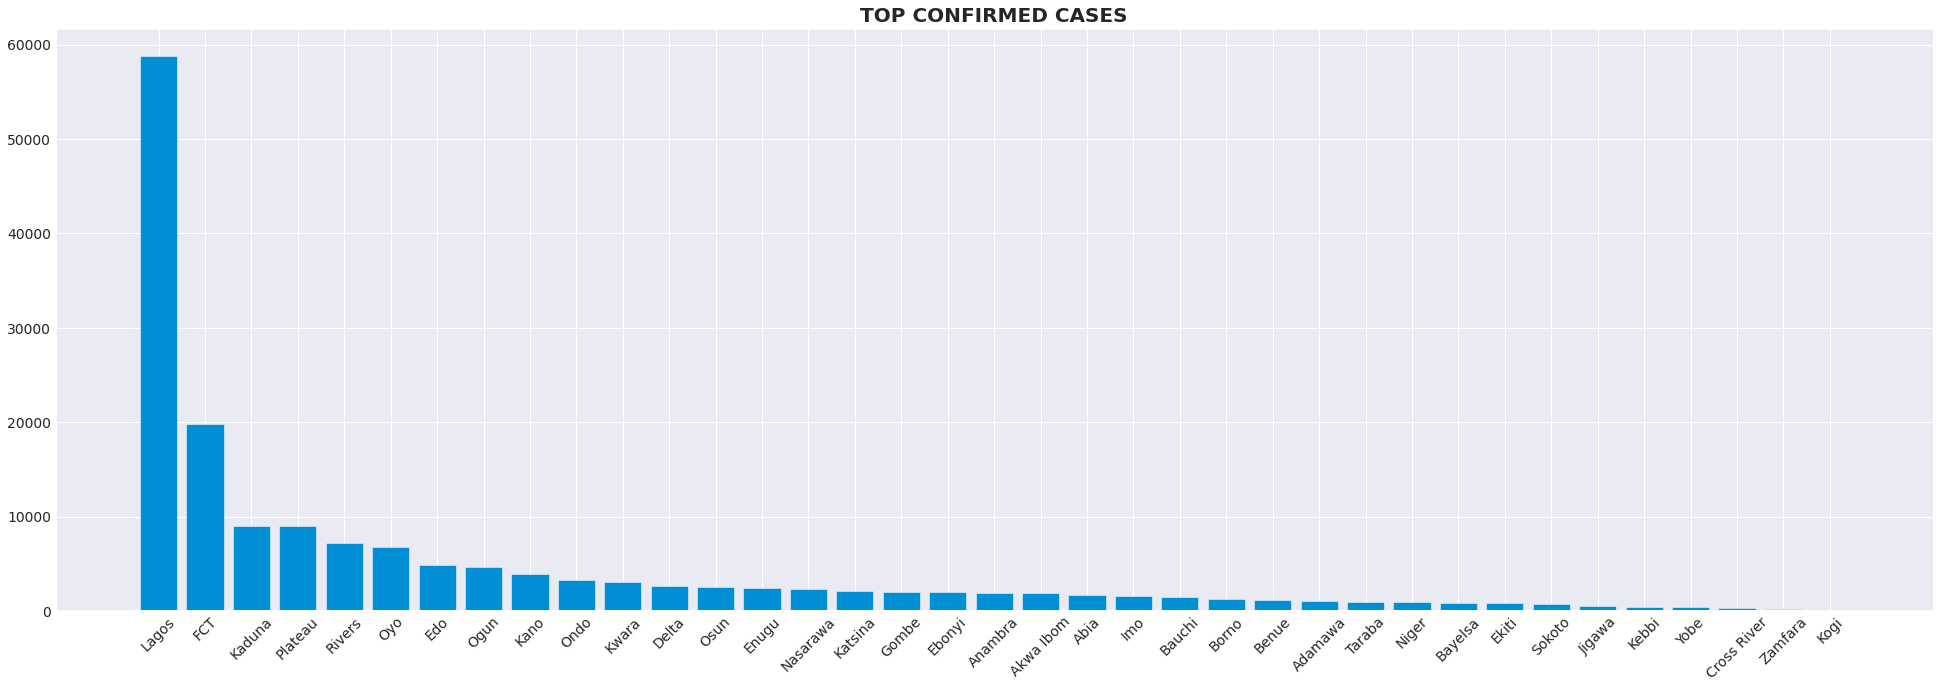

In [9]:
fig,ax=plt.subplots(figsize=(30,10))
plt.title('TOP CONFIRMED CASES',fontsize=20,weight='bold')
ax.bar(ncdc_data['States Affected'],ncdc_data['No. of Cases (Lab Confirmed)'])
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/top_confirmed')

In [10]:
ncdc_conf=pd.DataFrame(ncdc_data.groupby('States Affected')['No. of Cases (Lab Confirmed)']
                       .agg('sum')).sort_values(by='No. of Cases (Lab Confirmed)',ascending=False,axis=0)

In [11]:
ncdc_conf

,No. of Cases (Lab Confirmed)
States Affected,
Lagos,58801
FCT,19849
Kaduna,9068
Plateau,9060
Rivers,7215
Oyo,6856
Edo,4907
Ogun,4680
Kano,3971


The top 10 states with the highest number of confirmed cases are Lagos with	58713 cases, FCT with 19841 cases, Kaduna 9068 cases, Plateau 9060 cases, Rivers 7169 cases, Oyo 6855 cases, Edo 4907 cases, Ogun 4680 cases, Kan 3967 cases,and Ondo 3248 cases.

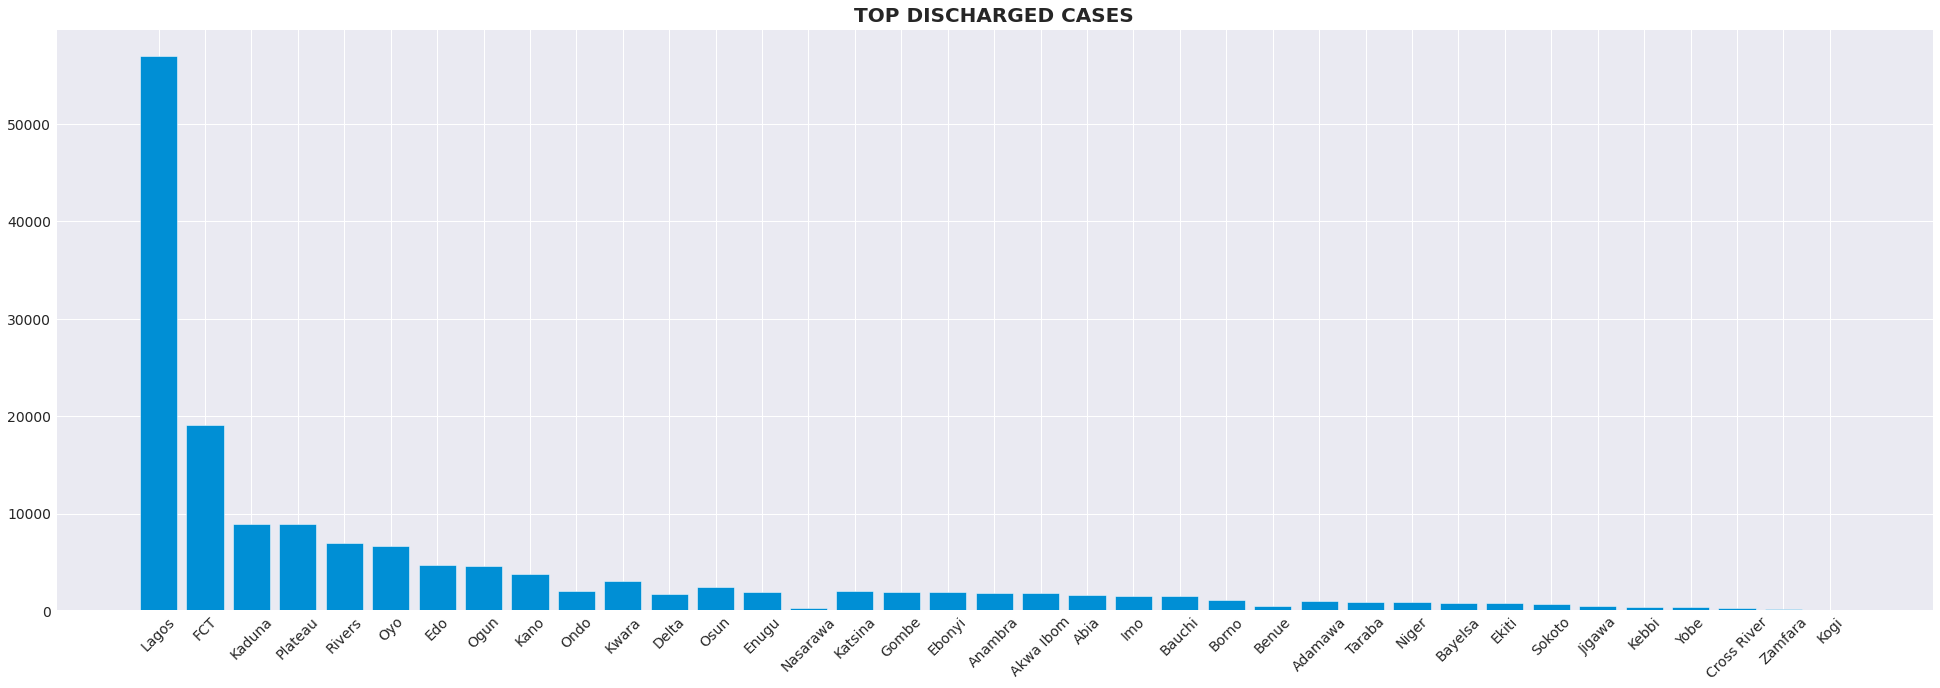

In [12]:
fig,ax=plt.subplots(figsize=(30,10))
plt.title('TOP DISCHARGED CASES',fontsize=20,weight='bold')
ax.bar(ncdc_data['States Affected'],ncdc_data['No. Discharged'])
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/top_10_discharged')

In [13]:
ncdc_disch=pd.DataFrame(ncdc_data.groupby('States Affected')['No. Discharged']
                       .agg('sum')).sort_values(by='No. Discharged',ascending=False,axis=0)

In [14]:
ncdc_disch

,No. Discharged
States Affected,
Lagos,56990
FCT,19106
Kaduna,9002
Plateau,9002
Rivers,7041
Oyo,6729
Edo,4720
Ogun,4628
Kano,3852


The top 10 states with the highest discharged cases are Lagos with 56990, FCT 19104, Plateau	9002, Kaduna 9000, Rivers 7040, Oyo 6729, Edo 4715, Ogun 4627, Kano	3849, and Kwara	3067

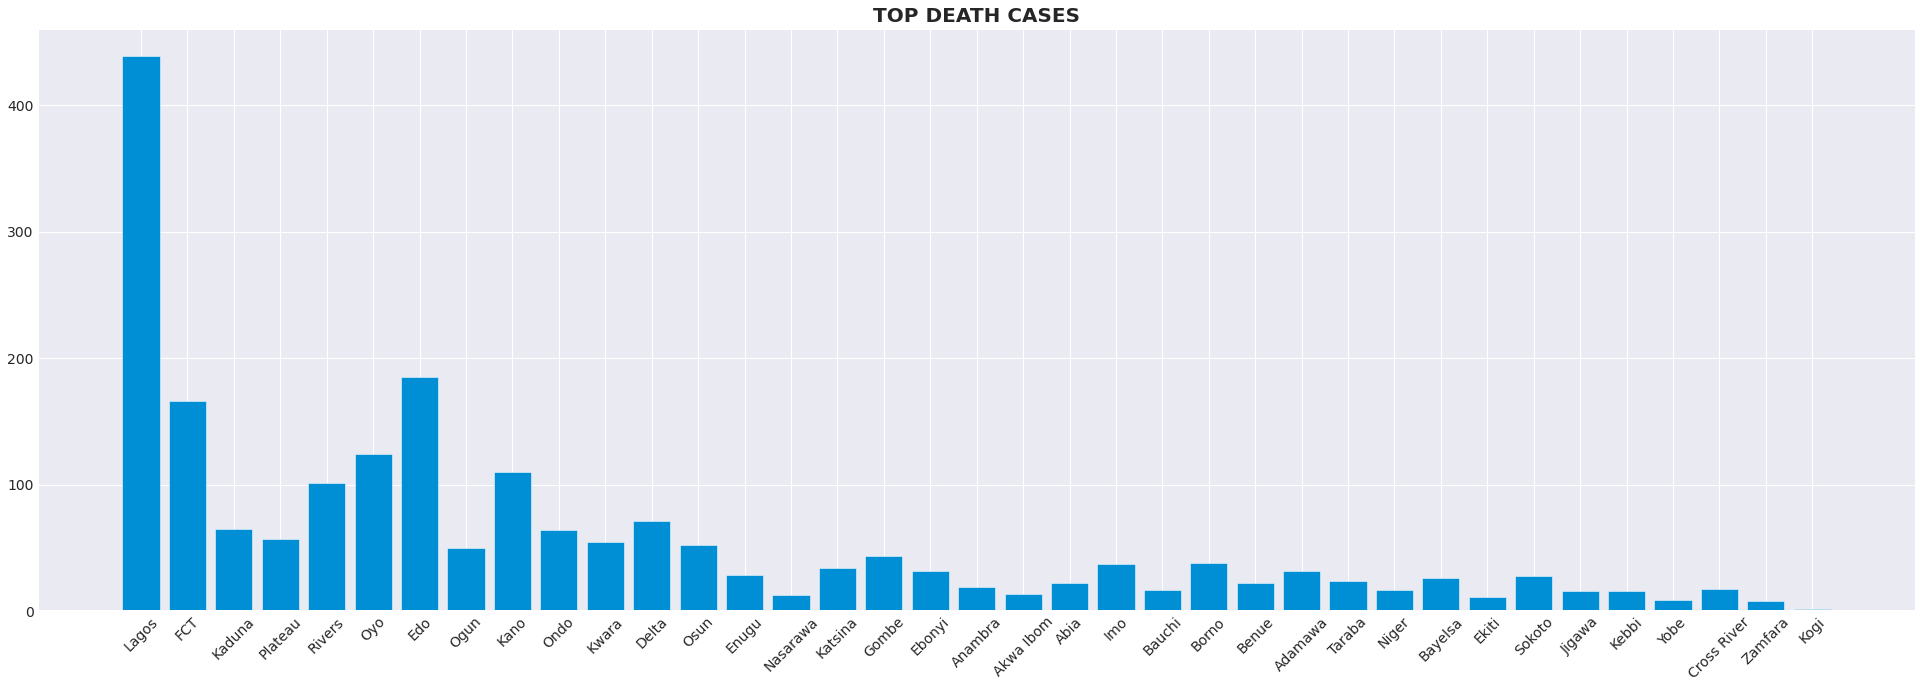

In [15]:
fig,ax=plt.subplots(figsize=(30,10))
plt.title('TOP DEATH CASES',fontsize=20,weight='bold')
ax.bar(ncdc_data['States Affected'],ncdc_data['No. of Deaths'])
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/top_10_deaths')

In [16]:
ncdc_death=pd.DataFrame(ncdc_data.groupby('States Affected')['No. of Deaths']
                       .agg('sum')).sort_values(by='No. of Deaths',ascending=False,axis=0)

In [17]:
ncdc_death

,No. of Deaths
States Affected,
Lagos,439
Edo,185
FCT,166
Oyo,124
Kano,110
Rivers,101
Delta,71
Kaduna,65
Ondo,64


The top 10 death cases are Lagos with 439, Edo	185, FCT 166, Oyo 124, Kano	110, Rivers	101, Delta 71, Kaduna 65, Ondo 6, Plateau 57

### Other Bivariate Analysis

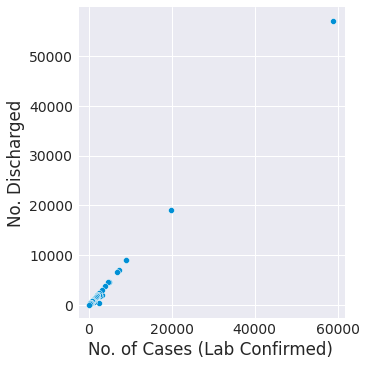

In [18]:
sns.relplot(data=ncdc_data,x='No. of Cases (Lab Confirmed)',y='No. Discharged')

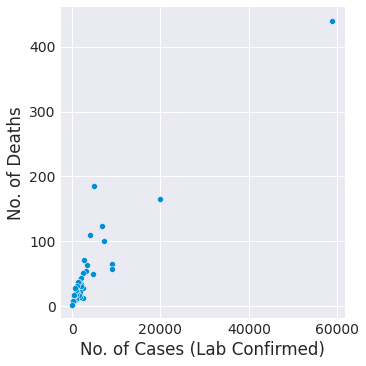

In [19]:
sns.relplot(data=ncdc_data,x='No. of Cases (Lab Confirmed)',y='No. of Deaths')

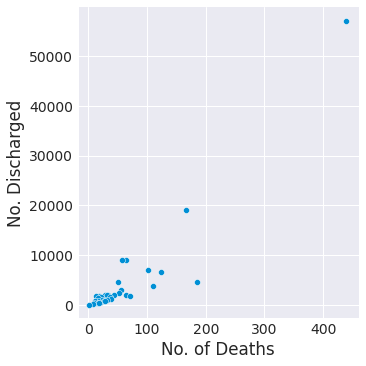

In [20]:
sns.relplot(data=ncdc_data,x='No. of Deaths',y='No. Discharged')

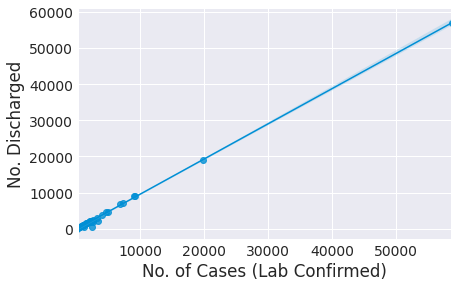

In [21]:
p=sns.regplot(data=ncdc_data,x='No. of Cases (Lab Confirmed)',y='No. Discharged')
plt.setp(p.lines,linewidth=1.5) 
plt.show()

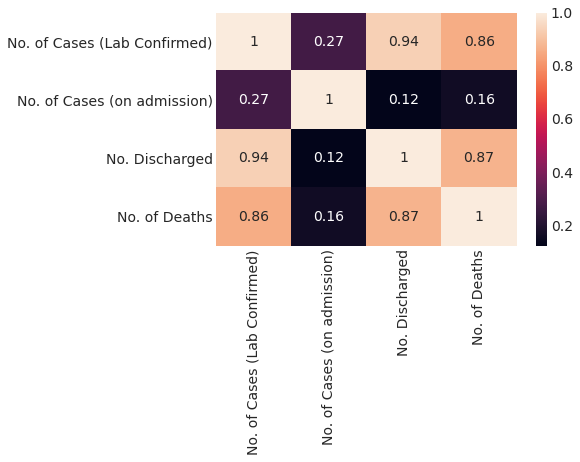

In [22]:
sns.heatmap(ncdc_data.corr(method='spearman'),annot=True)

This shows that there is high correlation between the Confirmed cases, Discharged cases and the Death cases

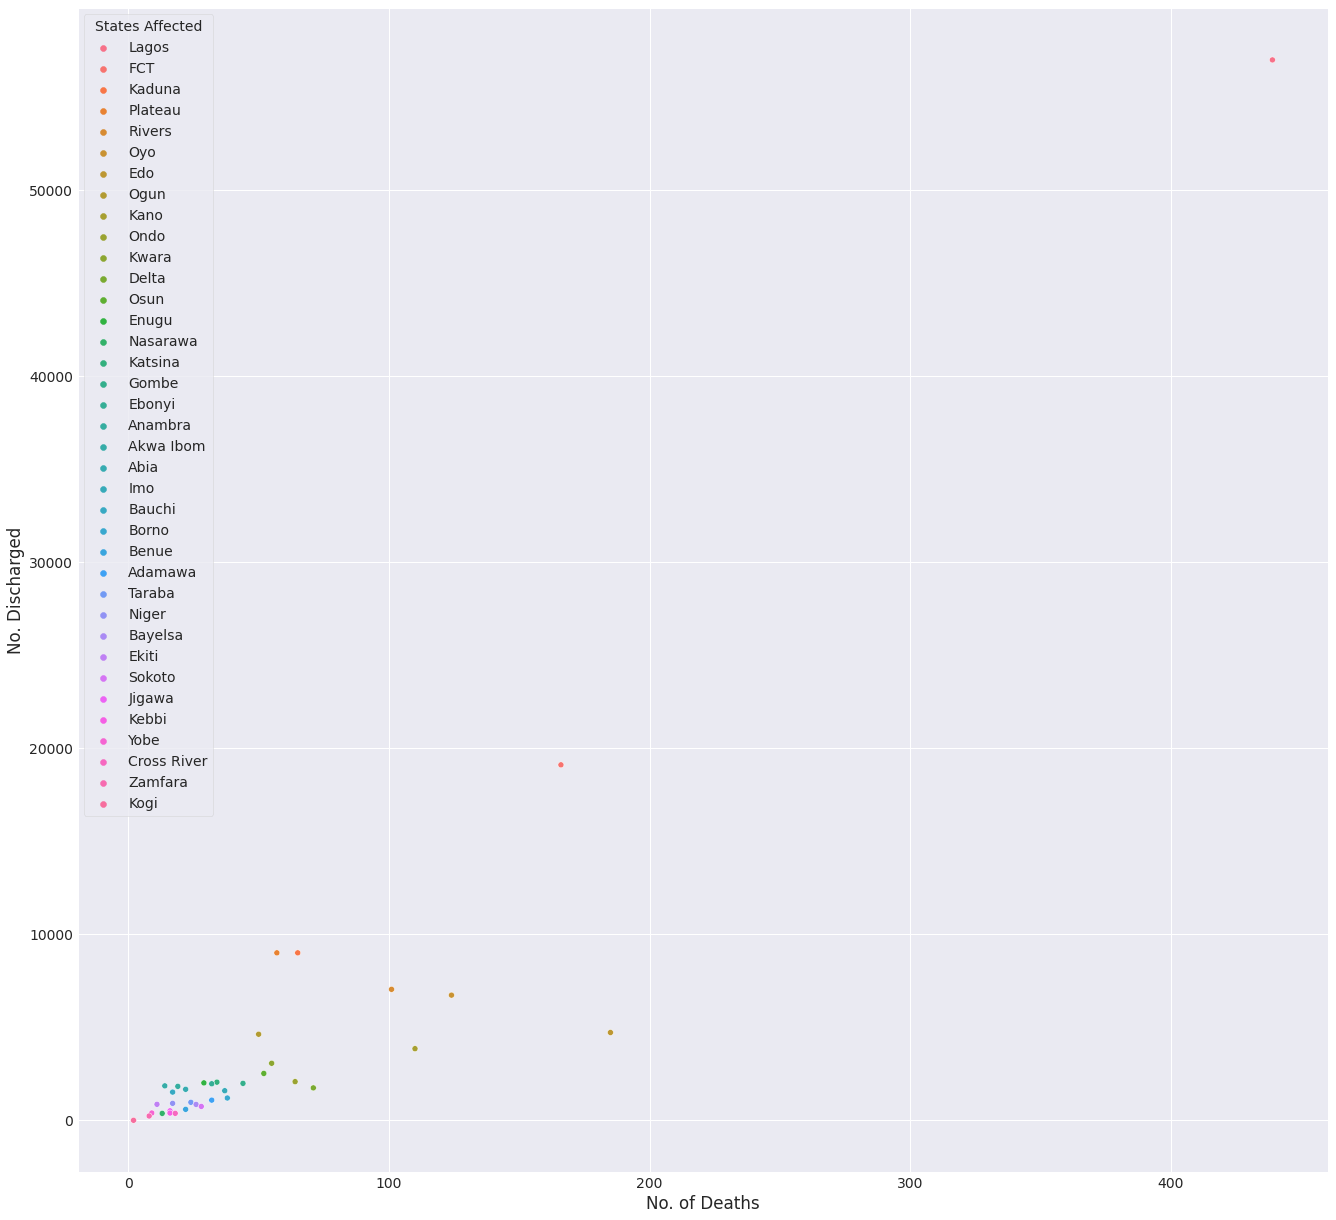

In [23]:
fig,ax=plt.subplots(figsize=(20,20))
sns.scatterplot(data=ncdc_data,x='No. of Deaths',y='No. Discharged',hue='States Affected',ax=ax)

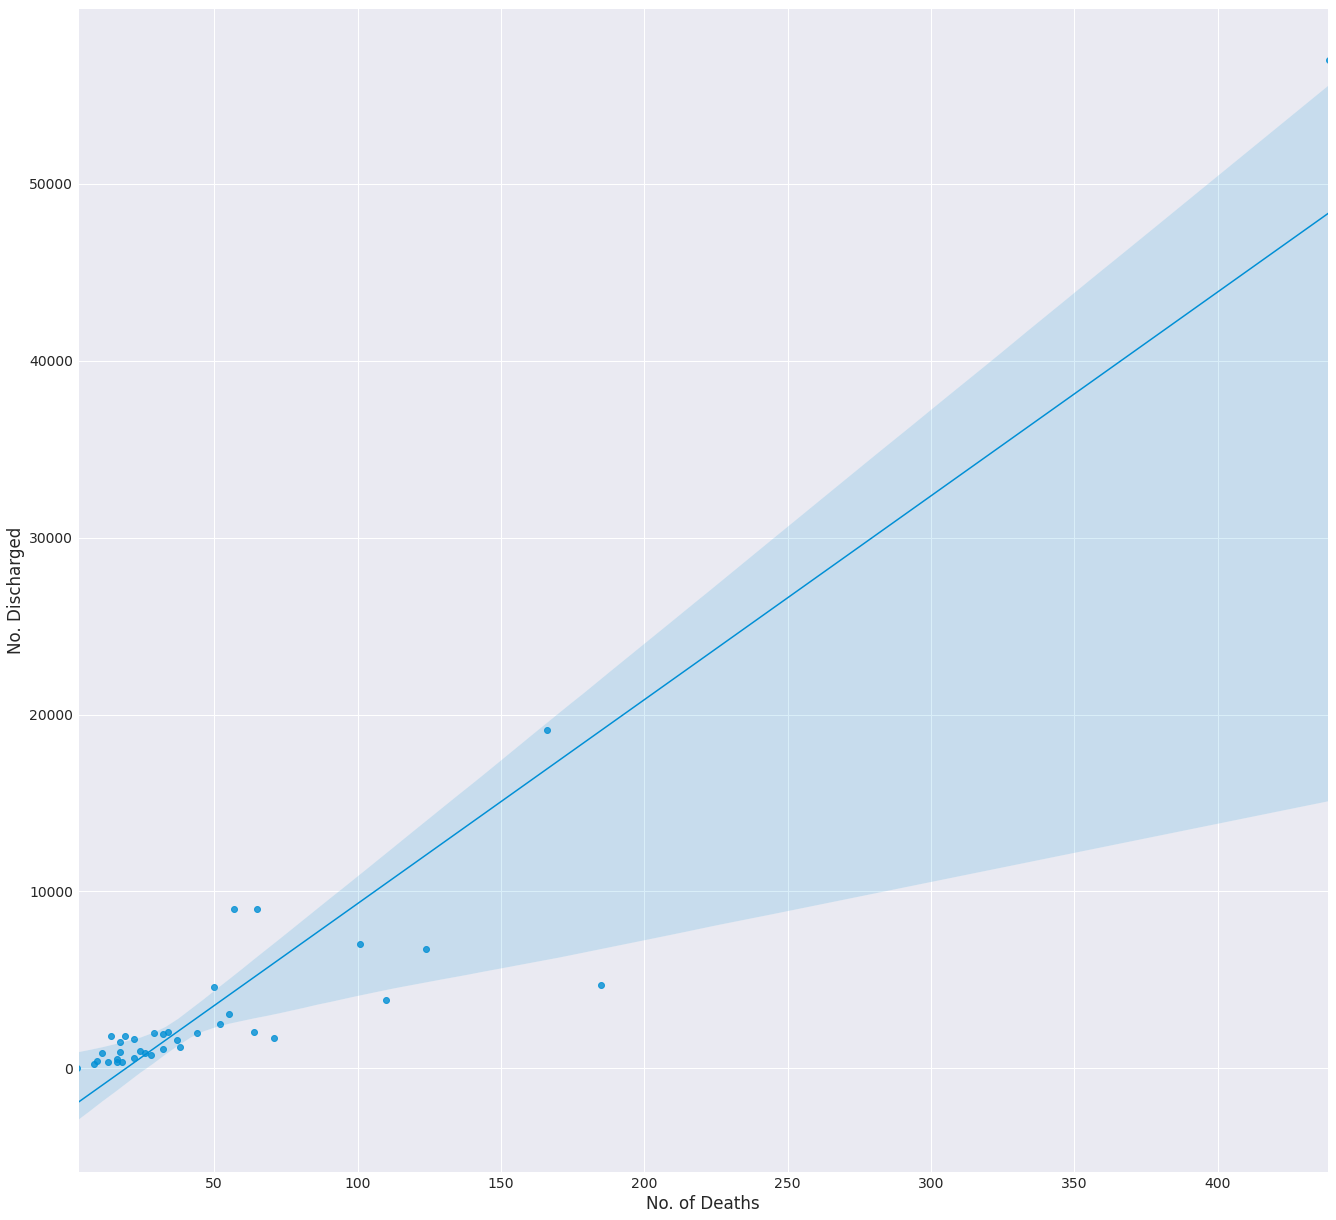

In [24]:
fig,ax=plt.subplots(figsize=(20,20))
p=sns.regplot(data=ncdc_data,x='No. of Deaths',y='No. Discharged')
plt.setp(p.lines,linewidth=1.5) 
plt.show()

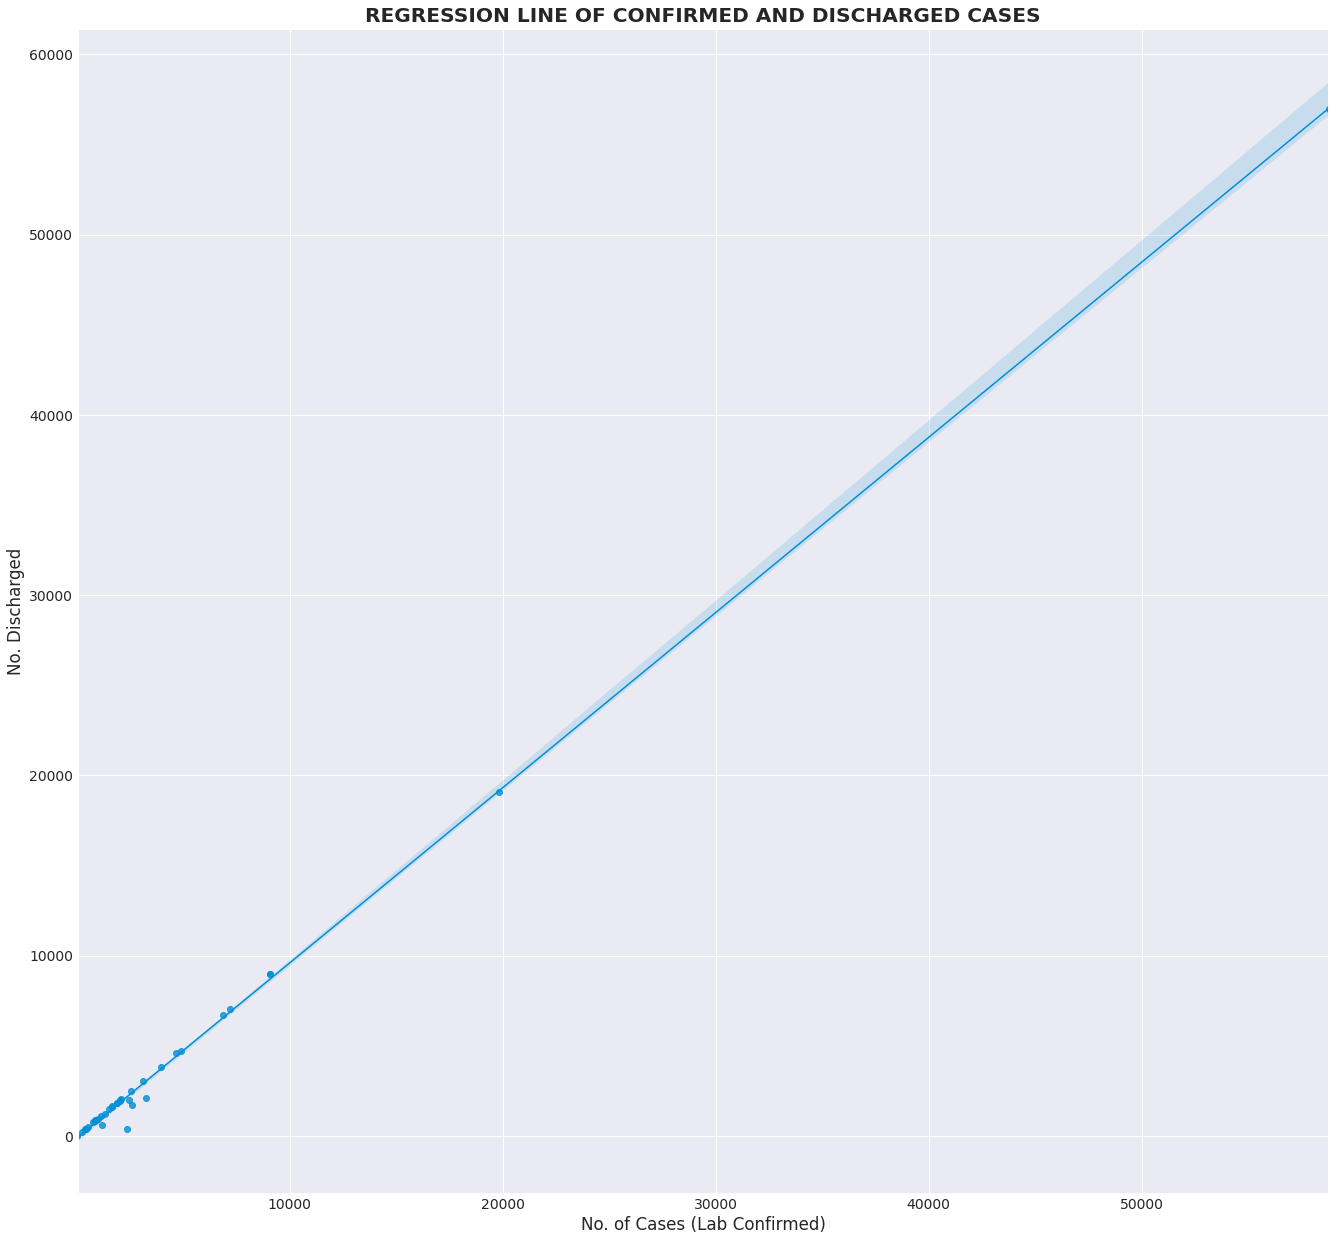

In [25]:
fig,ax=plt.subplots(figsize=(20,20))
p=sns.regplot(data=ncdc_data,x='No. of Cases (Lab Confirmed)',y='No. Discharged')
plt.setp(p.lines,linewidth=1.5) 
plt.title('REGRESSION LINE OF CONFIRMED AND DISCHARGED CASES',weight='bold')
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/regr_conf_disch')
plt.show()

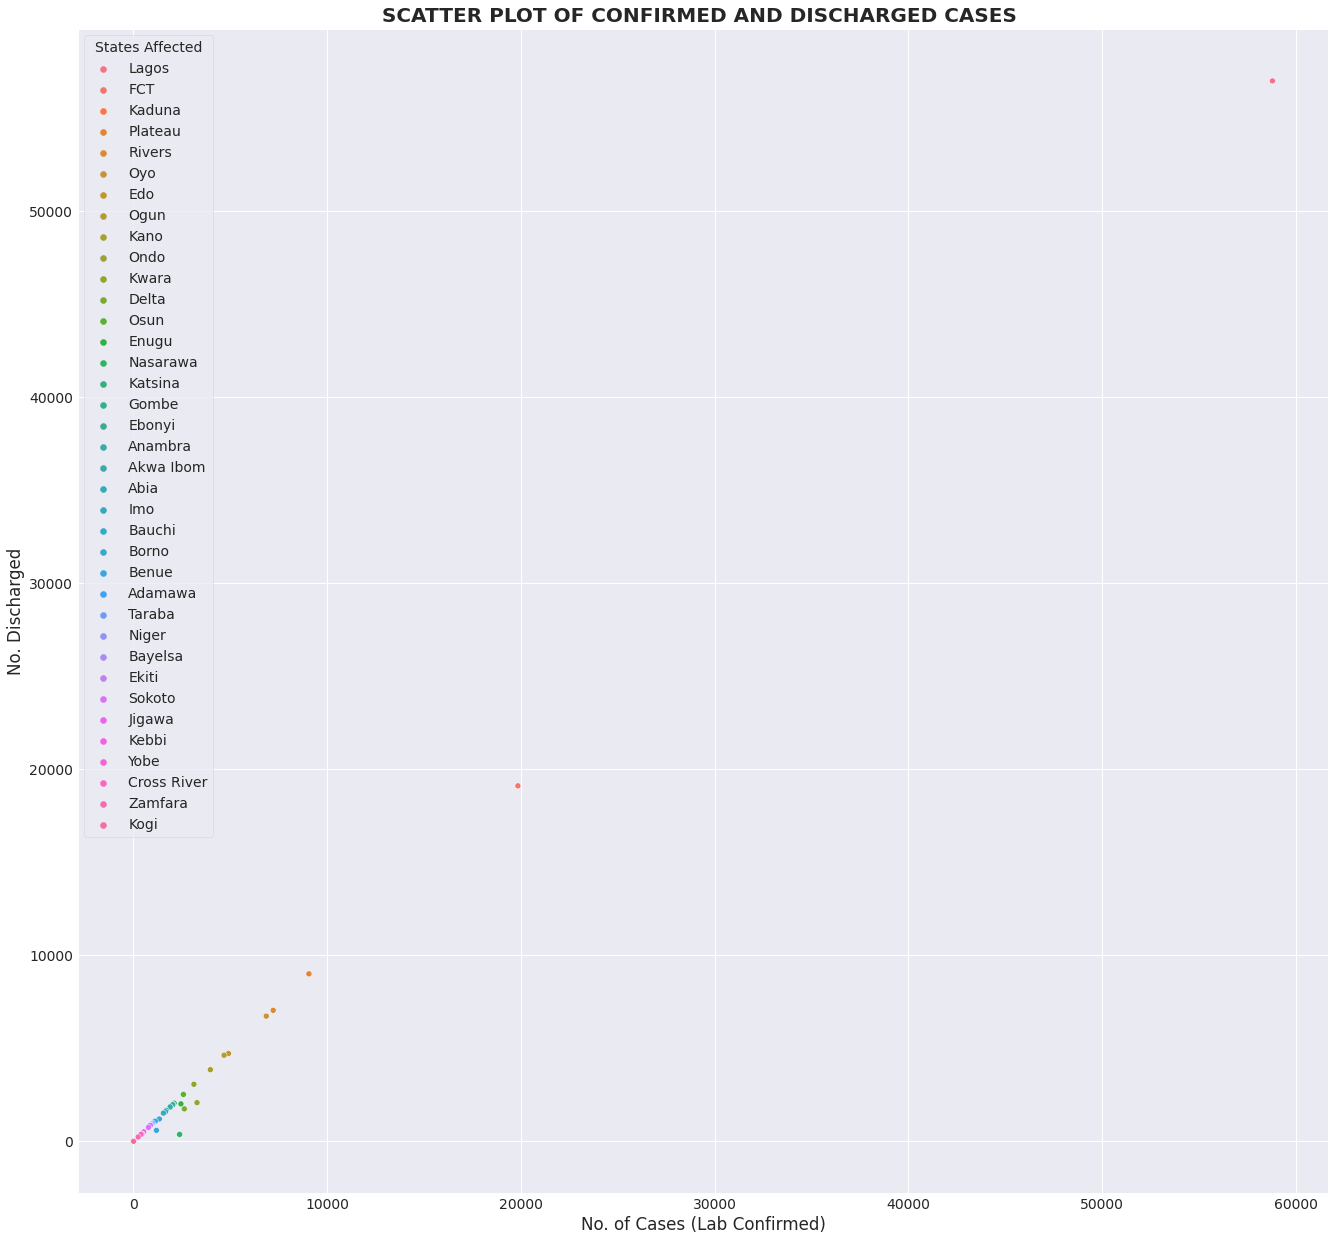

In [26]:
fig,ax=plt.subplots(figsize=(20,20))
sns.scatterplot(data=ncdc_data,x='No. of Cases (Lab Confirmed)',y='No. Discharged',hue='States Affected',ax=ax)
plt.title('SCATTER PLOT OF CONFIRMED AND DISCHARGED CASES ',fontsize=20,weight='bold')
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/scatter_conf_disch')

### Univariate Analysis

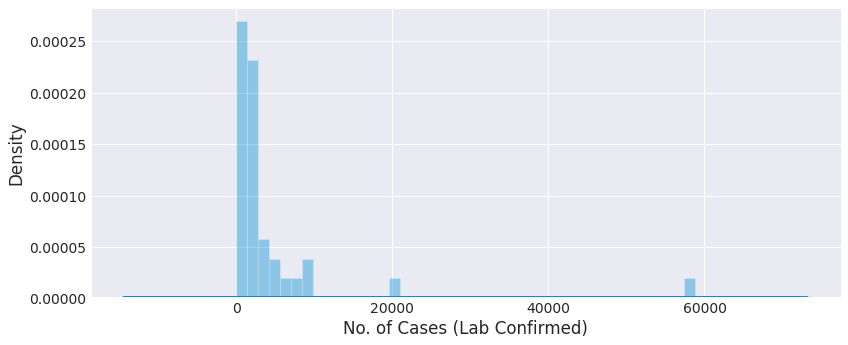

In [27]:
fig,ax=plt.subplots(figsize=(12,5))
sns.distplot(ncdc_data['No. of Cases (Lab Confirmed)'])

### John Hopkins Data

In [28]:
hopkins_confirmed.drop('Province/State',axis=1,inplace=True)
hopkins_recovered.drop('Province/State',axis=1,inplace=True)
hopkins_deaths.drop('Province/State',axis=1,inplace=True)

In [29]:
hopkins_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637


In [30]:
hopkins_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,54019,54040,54222,54382,54503,54534,54619,54634,54663,54686
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,115253,116126,117089,118041,119061,120072,121122,122105,123081,124312
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,86149,86280,86420,86554,86703,86857,87003,87137,87251,87359
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,12936,12962,12995,13021,13070,13104,13104,13155,13155,13155
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,24698,24713,24717,24772,25145,25187,25629,25650,25703,25715


In [31]:
hopkins_deaths.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,628,630,633,636,639,645,649,651,655,659


In [32]:
dates=hopkins_confirmed.columns[4:]
h1=hopkins_confirmed.melt(id_vars=['Country/Region','Lat','Long'],
                       value_vars=dates,var_name='Date',value_name='Confirmed')

h2=hopkins_recovered.melt(id_vars=['Country/Region','Lat','Long'],
                       value_vars=dates,var_name='Date',value_name='Recovered')

h3=hopkins_deaths.melt(id_vars=['Country/Region','Lat','Long'],
                       value_vars=dates,var_name='Date',value_name='Deaths')

### Extracting Nigeria's Data From John Hopkins Data

In [33]:
h1.tail()

,Country/Region,Lat,Long,Date,Confirmed
131995,Vietnam,14.058324,108.277199,5/16/21,4212
131996,West Bank and Gaza,31.952200,35.233200,5/16/21,303827
131997,Yemen,15.552727,48.516388,5/16/21,6543
131998,Zambia,-13.133897,27.849332,5/16/21,92436
131999,Zimbabwe,-19.015438,29.154857,5/16/21,38560


In [34]:
h2.tail()

,Country/Region,Lat,Long,Date,Recovered
124795,Vietnam,14.058324,108.277199,5/16/21,2668
124796,West Bank and Gaza,31.952200,35.233200,5/16/21,292523
124797,Yemen,15.552727,48.516388,5/16/21,3023
124798,Zambia,-13.133897,27.849332,5/16/21,90816
124799,Zimbabwe,-19.015438,29.154857,5/16/21,36329


In [35]:
h3.tail()

,Country/Region,Lat,Long,Date,Deaths
131995,Vietnam,14.058324,108.277199,5/16/21,37
131996,West Bank and Gaza,31.952200,35.233200,5/16/21,3428
131997,Yemen,15.552727,48.516388,5/16/21,1289
131998,Zambia,-13.133897,27.849332,5/16/21,1260
131999,Zimbabwe,-19.015438,29.154857,5/16/21,1582


In [36]:
d1=pd.merge(h1,h2,on=['Country/Region','Lat','Long','Date'],how='left')
full_data=pd.merge(d1,h3,on=['Country/Region','Lat','Long','Date'],how='left')

In [37]:
h1.shape

(132000, 5)

In [38]:
h2.shape

(124800, 5)

In [39]:
h3.shape

(132000, 5)

In [40]:
full_data.shape

(132960, 7)

In [41]:
full_data['Date']=pd.to_datetime(full_data['Date'])

In [42]:
full_data.head()

,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,Afghanistan,33.93911,67.709953,2020-01-23,0,0.0,0
1,Albania,41.15330,20.168300,2020-01-23,0,0.0,0
2,Algeria,28.03390,1.659600,2020-01-23,0,0.0,0
3,Andorra,42.50630,1.521800,2020-01-23,0,0.0,0
4,Angola,-11.20270,17.873900,2020-01-23,0,0.0,0


In [43]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132960 entries, 0 to 132959
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  132960 non-null  object        
 1   Lat             132000 non-null  float64       
 2   Long            132000 non-null  float64       
 3   Date            132960 non-null  datetime64[ns]
 4   Confirmed       132960 non-null  int64         
 5   Recovered       122400 non-null  float64       
 6   Deaths          132960 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 7.6+ MB


In [44]:
full_data.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,132000.000000,132000.000000,1.329600e+05,1.224000e+05,132960.000000
mean,20.385460,22.860666,1.811222e+05,1.138394e+05,4355.091719
std,25.117563,73.220059,1.240889e+06,6.788350e+05,25167.426320
min,-51.796300,-178.116500,0.000000e+00,0.000000e+00,0.000000
25%,4.570900,-19.020800,7.600000e+01,3.100000e+01,1.000000
50%,21.521757,20.902977,1.288000e+03,9.310000e+02,20.000000
75%,41.112900,84.250000,2.595200e+04,1.637650e+04,452.000000
max,71.706900,178.065000,3.294085e+07,2.117408e+07,585970.000000


In [45]:
full_data.isnull().sum()

Country/Region        0
Lat                 960
Long                960
Date                  0
Confirmed             0
Recovered         10560
Deaths                0
dtype: int64

In [46]:
full_data['Active Cases']=full_data['Confirmed']-full_data['Recovered']-full_data['Deaths']

In [47]:
full_data.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
0,Afghanistan,33.93911,67.709953,2020-01-23,0,0.0,0,0.0
1,Albania,41.15330,20.168300,2020-01-23,0,0.0,0,0.0
2,Algeria,28.03390,1.659600,2020-01-23,0,0.0,0,0.0
3,Andorra,42.50630,1.521800,2020-01-23,0,0.0,0,0.0
4,Angola,-11.20270,17.873900,2020-01-23,0,0.0,0,0.0
5,Antigua and Barbuda,17.06080,-61.796400,2020-01-23,0,0.0,0,0.0
6,Argentina,-38.41610,-63.616700,2020-01-23,0,0.0,0,0.0
7,Armenia,40.06910,45.038200,2020-01-23,0,0.0,0,0.0
8,Australia,-35.47350,149.012400,2020-01-23,0,0.0,0,0.0
9,Australia,-33.86880,151.209300,2020-01-23,0,0.0,0,0.0


In [48]:
full_data.tail(10)

,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
132950,United Kingdom,55.378100,-3.436000,2021-05-16,4450777,0.0,127679,4323098.0
132951,Uruguay,-32.522800,-55.765800,2021-05-16,240512,209338.0,3459,27715.0
132952,Uzbekistan,41.377491,64.585262,2021-05-16,96670,92111.0,668,3891.0
132953,Vanuatu,-15.376700,166.959200,2021-05-16,4,3.0,1,0.0
132954,Venezuela,6.423800,-66.589700,2021-05-16,215301,199202.0,2396,13703.0
132955,Vietnam,14.058324,108.277199,2021-05-16,4212,2668.0,37,1507.0
132956,West Bank and Gaza,31.952200,35.233200,2021-05-16,303827,292523.0,3428,7876.0
132957,Yemen,15.552727,48.516388,2021-05-16,6543,3023.0,1289,2231.0
132958,Zambia,-13.133897,27.849332,2021-05-16,92436,90816.0,1260,360.0
132959,Zimbabwe,-19.015438,29.154857,2021-05-16,38560,36329.0,1582,649.0


In [49]:
full_data_flat=full_data.set_index(['Country/Region'])

In [50]:
nigeria=full_data_flat.loc['Nigeria']

In [51]:
nigeria.tail(10)

,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
Country/Region,,,,,,,
Nigeria,9.082,8.6753,2021-05-07,165340,155454.0,2065,7821.0
Nigeria,9.082,8.6753,2021-05-08,165370,156250.0,2065,7055.0
Nigeria,9.082,8.6753,2021-05-09,165419,156297.0,2065,7057.0
Nigeria,9.082,8.6753,2021-05-10,165468,156318.0,2065,7085.0
Nigeria,9.082,8.6753,2021-05-11,165515,156358.0,2065,7092.0
Nigeria,9.082,8.6753,2021-05-12,165559,156374.0,2066,7119.0
Nigeria,9.082,8.6753,2021-05-13,165612,156387.0,2066,7159.0
Nigeria,9.082,8.6753,2021-05-14,165661,156399.0,2066,7196.0
Nigeria,9.082,8.6753,2021-05-15,165702,156412.0,2066,7224.0


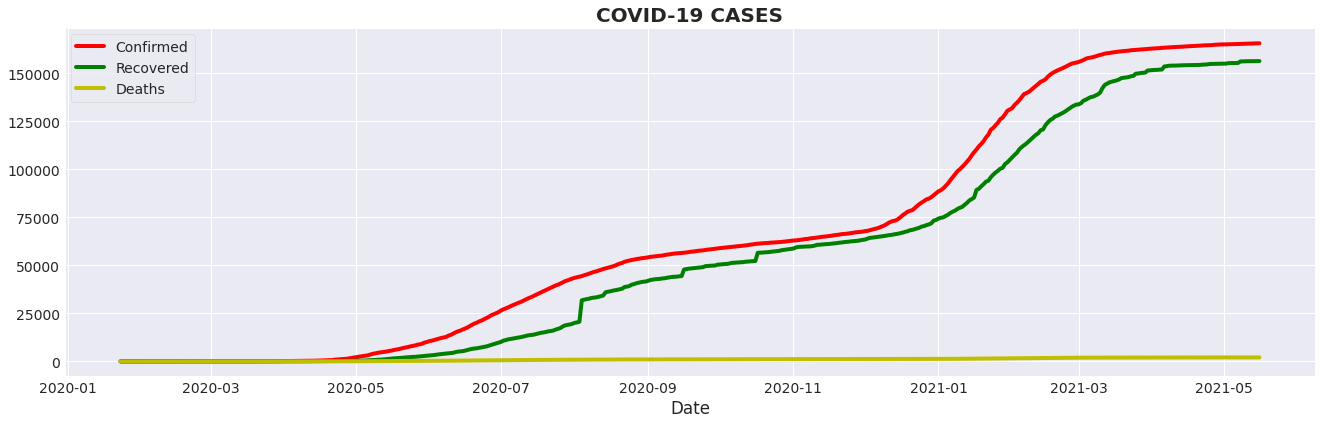

In [52]:
fig,ax=plt.subplots(figsize=(20,6))
sns.lineplot(x='Date',y='Confirmed',data=nigeria,ax=ax,label='Confirmed',c='r')
sns.lineplot(x='Date',y='Recovered',data=nigeria,ax=ax,label='Recovered',c='g')
sns.lineplot(x='Date',y='Deaths',data=nigeria,ax=ax,label='Deaths',c='y')
plt.ylabel(ylabel=None)

plt.title('COVID-19 CASES',fontsize=20,weight='bold')
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/date_to_cases')

A large proportion of those that were confirmed positive have recovered

In [53]:
nigeria['Infection Rate']=nigeria['Confirmed'].diff()

In [54]:
d_ir=nigeria[['Date','Infection Rate']]

In [55]:
d_ir

,Date,Infection Rate
Country/Region,,
Nigeria,2020-01-23,NaN
Nigeria,2020-01-24,0.0
Nigeria,2020-01-25,0.0
Nigeria,2020-01-26,0.0
Nigeria,2020-01-27,0.0
...,...,...
Nigeria,2021-05-12,44.0
Nigeria,2021-05-13,53.0
Nigeria,2021-05-14,49.0


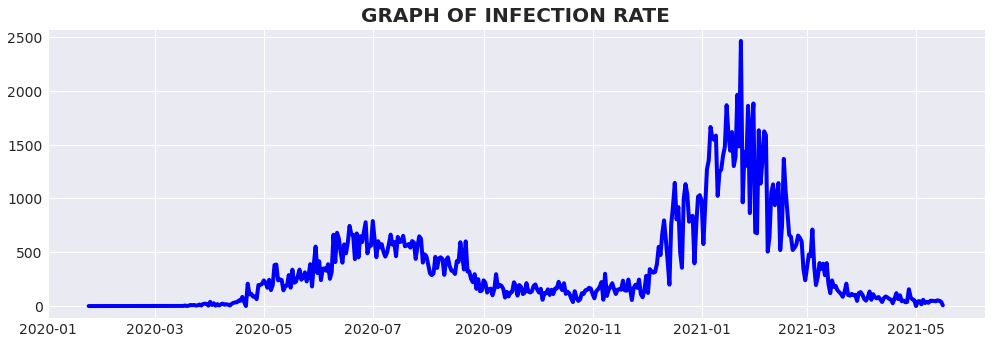

In [56]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(nigeria['Date'],nigeria['Infection Rate'],c='b')
plt.title('GRAPH OF INFECTION RATE',fontsize=20,weight='bold')
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/inf_rate')

There was a huge spike in the infection rate from around November 2020 to March 2021 after which the number of cases have been consolidating 

In [57]:
nigeria['Infection Rate'].max()

2464.0

Maximum infection rate is 2464 we look further to discover when this occured

In [58]:
nigeria[nigeria['Infection Rate']==nigeria['Infection Rate'].max()]['Date']

Country/Region
Nigeria   2021-01-23
Name: Date, dtype: datetime64[ns]

The date with the maximum infection rate was on the 23rd of january 2021 with an infection rate of 2464.

### Covid External Data (Index Data)

In [59]:
covid_external_data

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [60]:
ncdc_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58801,1372,56990,439
1,FCT,19849,577,19106,166
2,Kaduna,9068,1,9002,65
3,Plateau,9060,1,9002,57
4,Rivers,7215,73,7041,101
5,Oyo,6856,3,6729,124
6,Edo,4907,2,4720,185
7,Ogun,4680,2,4628,50
8,Kano,3971,9,3852,110
9,Ondo,3283,1139,2080,64


In [61]:
covid_external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.2+ KB


In [62]:
covid_external_data.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [63]:
covid_external_data.isnull().sum()

states                     0
region                     0
Population                 0
Overall CCVI Index         0
Age                        0
Epidemiological            0
Fragility                  0
Health System              0
Population Density         0
Socio-Economic             0
 Transport Availability    0
Acute IHR                  0
dtype: int64

In [144]:
region_data=covid_external_data.groupby('region')[covid_external_data.columns].agg('mean').sort_values(by='Overall CCVI Index').reset_index()
region_data

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,South West,7.106167e+06,0.150000,0.616667,0.616667,0.333333,0.333333,0.733333,0.133333,0.300000,1.031667
1,North Central,4.792000e+06,0.328571,0.314286,0.485714,0.542857,0.414286,0.342857,0.528571,0.514286,0.874286
2,South South,4.806833e+06,0.416667,0.700000,0.616667,0.400000,0.466667,0.600000,0.316667,0.450000,1.025000
3,South East,5.430400e+06,0.420000,0.900000,0.720000,0.260000,0.400000,0.860000,0.300000,0.060000,1.098000
4,North West,7.807857e+06,0.785714,0.214286,0.242857,0.514286,0.642857,0.414286,0.871429,0.757143,0.872857
5,North East,4.899167e+06,0.883333,0.416667,0.400000,0.916667,0.733333,0.150000,0.766667,0.816667,0.873333


SOUTH WEST

* The fragility index is low indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal
* The data from the aging index shows that the south west is densely consisting of aged people that can be easily affected by the disease
* The Epidemology in the south west shows that quite the percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.
* The health care index indicates the health care system is not negatively impacting on the pandemic implying that the professionals and facilities are curbing the virus well enough
* the South west has a very high population density which could be a very key contributor to the high number of cases confirmed
* The Socio economic index(variables: unemployment, income, poverty level) puts the south west at a advantaged spot relative to other geopolitical zones
* The Mobility/Transportation index is low meaning that the transportation fraction in the covid fight is very active

SOUTH EAST
* The fragility index is low indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal
* The data from the aging index shows that there are more aged people in the south eastern part of Nigeria compared to every other state
* The Epidemology of the south east shows that a large percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.
* The health care index indicates a postive as the positive correlation effect is minimal 
* the South east has the highest population density and IHR indexes
* The Socio economic index also puts the south east at a advantaged spot
* The Mobility/Transportation index is low meaning that the transportation fraction in the covid fight is very active

SOUTH SOUTH
* The south south also has a  low CCVI and fragility index indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal
* The data from the aging index shows that the south south is densely consisting of aged people 
* The Epidemology os the south west shows that quite the percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.
* The quality of the health care service is also good enough and does not contributed to the number of death/active cases
* the South south has a moderate population density index
* The Socio economic index is relatively good
* The transportation system is good enough

NORTH CENTRAL
* High fragility index 
* The data from the aging index in the North Central is low
* The Epidemology in the North Central shows that a moderate percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.
* The health care index is high indicating that the health system is negatively affecting the citizens as the services, professional and treatment system are poor
* the North central has a very low population density
* The Socio economic index puts the North central on an averaged point in the economic scale
* The Mobility/Transportation index is high that the transportation system for infected people to the hosiptals

NORTH EAST
* The North East has the highest CCVI
* The fragility index is the highest of all regions implying high degree of vulnerability
* The data from the aging index in the North East is low
* The Epidemology in the North East shows that a small percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.
* The health care index indicates an average quality level of health care services or professionals 
* The North East has a very high population density which could be a very key contributor to the high number of cases confirmed
* The Socio economic index puts the North East at a huge disadvantage compared to other zones
* The Mobility/Transportation index is high indicating poor transport capability of the zone

NORTH WEST

* The North West has a very high CCVI 
* An average fragility index status implying probable degree of vulnerability
* The data from the aging index in the North West is low
* The Epidemology in the North West shows that a small percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.
* The health care index indicates poor health service conditions
* The North West has a very high population density which could be a very key contributor to the high number of cases confirmed
* The Socio economic index puts the North West at a huge disadvantage compared to other zones indicating that the high level of unemployment, low average income and high poverty status
* The Mobility/Transportation index is high indicating poor transport capability of the zone

One common factor to all regions is the indication of Acute High IHR which shows a very high result implying that a significant percentage of those who were infected had to be kepts in special care

In [65]:
data_combined=pd.merge(ncdc_data,covid_external_data,left_on='States Affected',
                       right_on='states',how='inner').drop('states',axis=1)

In [66]:
data_combined

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58801,1372,56990,439,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19849,577,19106,166,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,9068,1,9002,65,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,9060,1,9002,57,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Rivers,7215,73,7041,101,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
5,Oyo,6856,3,6729,124,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,4907,2,4720,185,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,4680,2,4628,50,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,3971,9,3852,110,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Ondo,3283,1139,2080,64,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


In [67]:
data_combined.groupby(['States Affected'])[data_combined.columns].agg('mean').sort_values(by='Overall CCVI Index').reset_index()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58801,1372,56990,439,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,Osun,2578,6,2520,52,5252000,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06
2,Edo,4907,2,4720,185,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
3,Ondo,3283,1139,2080,64,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
4,Kogi,5,0,3,2,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
5,Abia,1690,0,1668,22,4190000,0.2,0.9,0.6,0.1,0.3,0.9,0.2,0.0,1.14
6,Oyo,6856,3,6729,124,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
7,Enugu,2453,411,2013,29,4801000,0.2,0.9,0.4,0.0,0.3,0.7,0.4,0.1,1.14
8,Ogun,4680,2,4628,50,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
9,Ekiti,874,2,861,11,3593000,0.3,0.8,0.3,0.5,0.2,0.8,0.1,0.4,1.03


In [68]:
data_combined.shape

(35, 16)

In [69]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   States Affected               35 non-null     object 
 1   No. of Cases (Lab Confirmed)  35 non-null     int64  
 2   No. of Cases (on admission)   35 non-null     int64  
 3   No. Discharged                35 non-null     int64  
 4   No. of Deaths                 35 non-null     int64  
 5   region                        35 non-null     object 
 6   Population                    35 non-null     int64  
 7   Overall CCVI Index            35 non-null     float64
 8   Age                           35 non-null     float64
 9   Epidemiological               35 non-null     float64
 10  Fragility                     35 non-null     float64
 11  Health System                 35 non-null     float64
 12  Population Density            35 non-null     float64
 13  Socio-E

In [70]:
data_combined.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4660.685714,153.685714,4448.828571,58.171429,5.976257e+06,0.514286,0.511429,0.494286,0.482857,0.528571,0.514286,0.502857,0.500000,0.956286
std,10136.758577,337.399464,9846.790294,79.019166,2.629625e+06,0.302094,0.307525,0.305771,0.297525,0.288578,0.300140,0.309160,0.309649,0.101781
min,5.000000,0.000000,3.000000,2.000000,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790000
25%,963.500000,2.000000,887.000000,18.000000,4.688500e+06,0.300000,0.250000,0.250000,0.250000,0.300000,0.300000,0.250000,0.250000,0.870000
50%,1909.000000,9.000000,1826.000000,32.000000,5.252000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.930000
75%,3627.000000,53.000000,3459.500000,60.500000,6.405500e+06,0.800000,0.800000,0.750000,0.700000,0.800000,0.800000,0.800000,0.800000,1.050000
max,58801.000000,1372.000000,56990.000000,439.000000,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.140000


In [71]:
data_combined.shape

(35, 16)

The reason for the incomplete data entry is because of misspelt state entry of Nassarawa and upper case used in Cross R/river from both dataframes and the result are the null values on merging

In [72]:
data_combined.isnull().sum()

States Affected                 0
No. of Cases (Lab Confirmed)    0
No. of Cases (on admission)     0
No. Discharged                  0
No. of Deaths                   0
region                          0
Population                      0
Overall CCVI Index              0
Age                             0
Epidemiological                 0
Fragility                       0
Health System                   0
Population Density              0
Socio-Economic                  0
 Transport Availability         0
Acute IHR                       0
dtype: int64

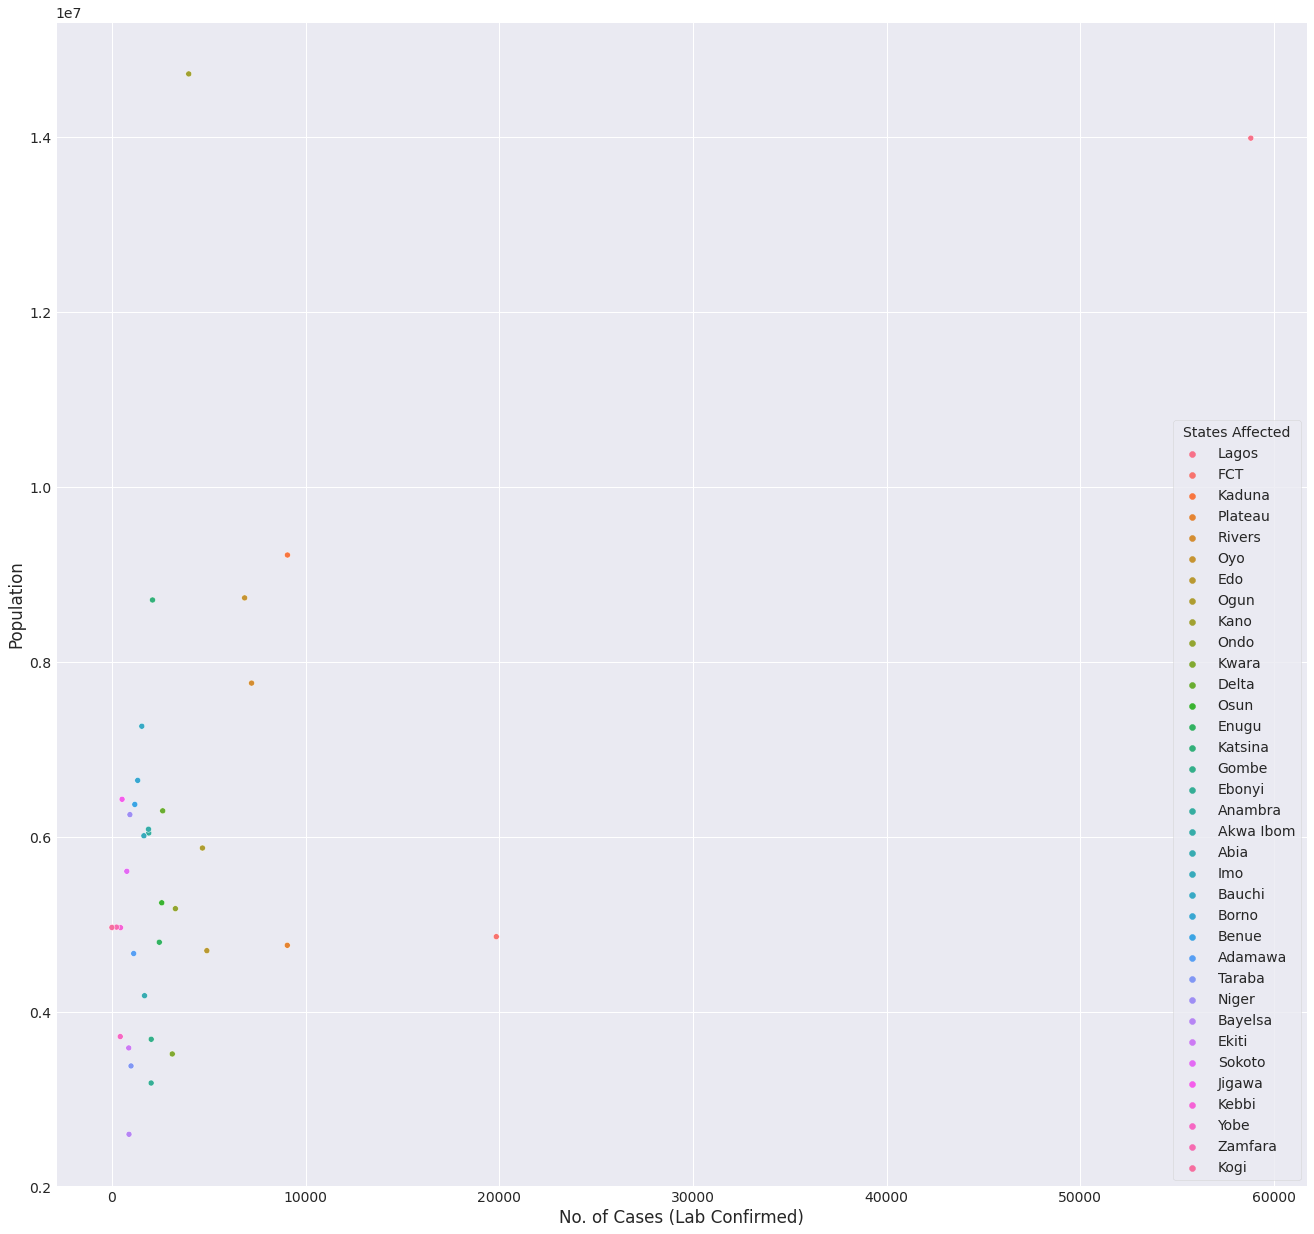

In [73]:
fig,ax=plt.subplots(figsize=(20,10))
sns.scatterplot(x='No. of Cases (Lab Confirmed)',y='Population',hue='States Affected',data=data_combined)

In [74]:
n_largest_data=data_combined.nlargest(10,'No. of Cases (Lab Confirmed)')

In [75]:
n_largest_data.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths',
       'region', 'Population', 'Overall CCVI Index', 'Age', 'Epidemiological',
       'Fragility', 'Health System', 'Population Density', 'Socio-Economic',
       ' Transport Availability', 'Acute IHR'],
      dtype='object')

In [76]:
n_largest_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58801,1372,56990,439,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19849,577,19106,166,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,9068,1,9002,65,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,9060,1,9002,57,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Rivers,7215,73,7041,101,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
5,Oyo,6856,3,6729,124,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,4907,2,4720,185,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,4680,2,4628,50,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,3971,9,3852,110,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Ondo,3283,1139,2080,64,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


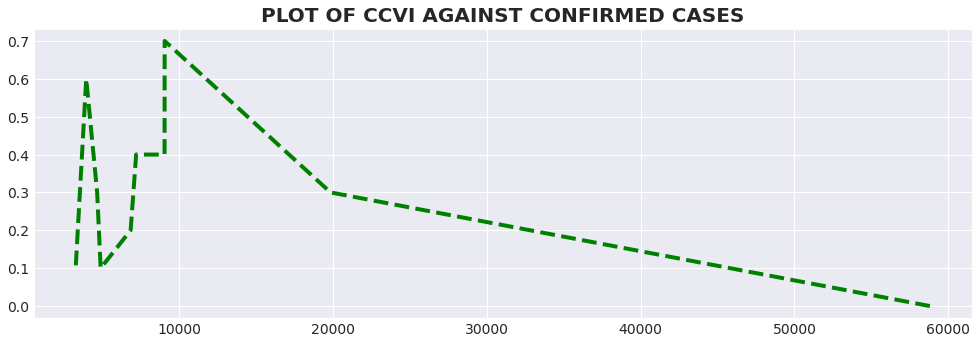

In [77]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(n_largest_data['No. of Cases (Lab Confirmed)'],n_largest_data['Overall CCVI Index'],'g--')
plt.title('PLOT OF CCVI AGAINST CONFIRMED CASES',fontsize=20,weight='bold')
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/top_10_cases')

Areas with low CCVI have relatively high number of confirmed cases

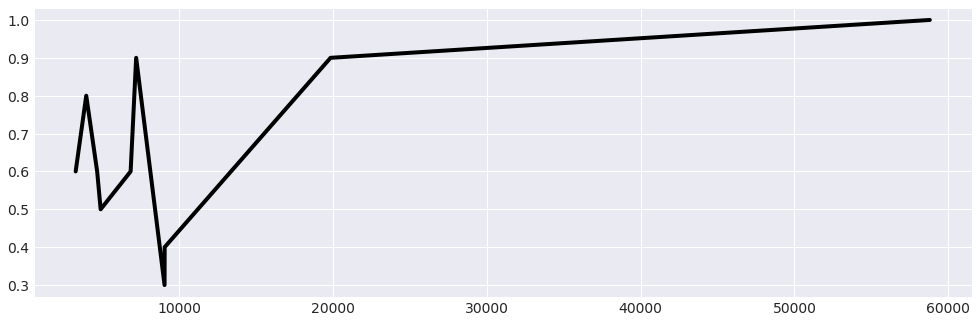

In [78]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(n_largest_data['No. of Cases (Lab Confirmed)'],n_largest_data['Population Density'],'k')

Densely populated area also contributed to the source capsule of high number of confirmed cases

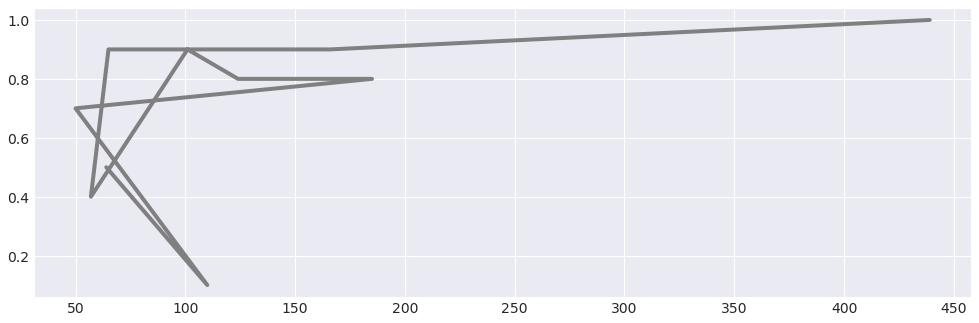

In [79]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(n_largest_data['No. of Deaths'],n_largest_data['Epidemiological'],'grey')

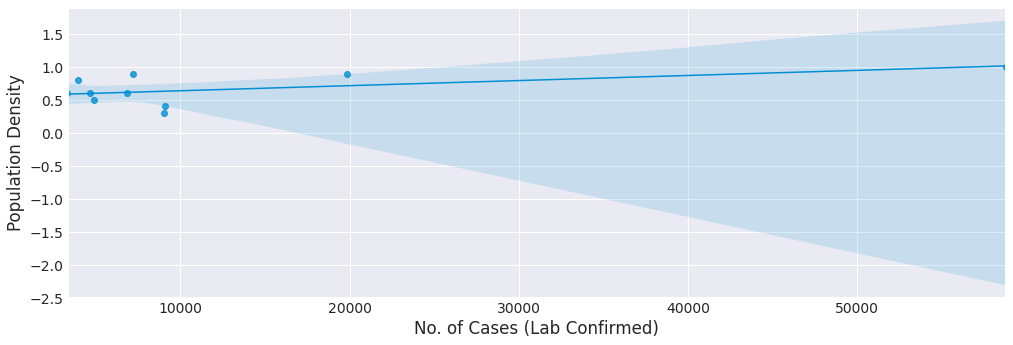

In [80]:
fig,ax=plt.subplots(figsize=(15,5))
p=sns.regplot(x='No. of Cases (Lab Confirmed)',y='Population Density',data=n_largest_data)
plt.setp(p.lines,linewidth=1.5) 
plt.show()

### QUARTERLY GDP DATA ANALYSIS

In [81]:
realgdp_data

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [82]:
realgdp_data[['Q1','Q2','Q3','Q4']].mean(axis=0)

Q1    1.607174e+07
Q2    1.635760e+07
Q3    1.788093e+07
Q4    1.600959e+07
dtype: float64

The average cummmulative gdp is highest at the third quarter

In [83]:
df=pd.DataFrame(realgdp_data[['Q1','Q2','Q3','Q4']].mean(axis=1)).reset_index()

In [84]:
df['index']=realgdp_data['Year']
df.columns=['Year','Total GDP']
df

,Year,Total GDP
0,2014,1.678820e+07
1,2015,1.725598e+07
2,2016,1.698281e+07
3,2017,1.712275e+07
4,2018,1.744999e+07
5,2019,1.784753e+07
6,2020,1.261250e+07


The year with the highest total GDP was year 2019 and the lowest being 2020 most likely because of the pandemic (COVID-19)

In [85]:
realgdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 344.0 bytes


In [86]:
realgdp_data['Year']=realgdp_data['Year'].astype('object')

In [87]:
realgdp_data.describe()

,Q1,Q2,Q3,Q4
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07


In [88]:
realgdp_data

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [89]:
quarters=realgdp_data.columns[1:]
quarters
gdp=pd.melt(realgdp_data,id_vars=['Year'],value_vars=quarters,var_name='Q1-Q4',value_name='GDP')

In [90]:
gdp

,Year,Q1-Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [91]:
qt1=gdp[:7]
qt1

,Year,Q1-Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00


In [92]:
qt2=gdp[7:14]
qt2

,Year,Q1-Q4,GDP
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41
10,2017,Q2,16334719.27
11,2018,Q2,16580508.07
12,2019,Q2,16931434.89
13,2020,Q2,15890000.00


In [93]:
qt3=gdp[14:21]
qt3

,Year,Q1-Q4,GDP
14,2014,Q3,17479127.58
15,2015,Q3,17976234.59
16,2016,Q3,17555441.69
17,2017,Q3,17760228.17
18,2018,Q3,18081342.10
19,2019,Q3,18494114.17
20,2020,Q3,17820000.00


In [94]:
qt4=gdp[21:]
qt4

,Year,Q1-Q4,GDP
21,2014,Q4,18150356.45
22,2015,Q4,18533752.07
23,2016,Q4,18213537.29
24,2017,Q4,18598067.07
25,2018,Q4,19041437.59
26,2019,Q4,19530000.00
27,2020,Q4,0.00


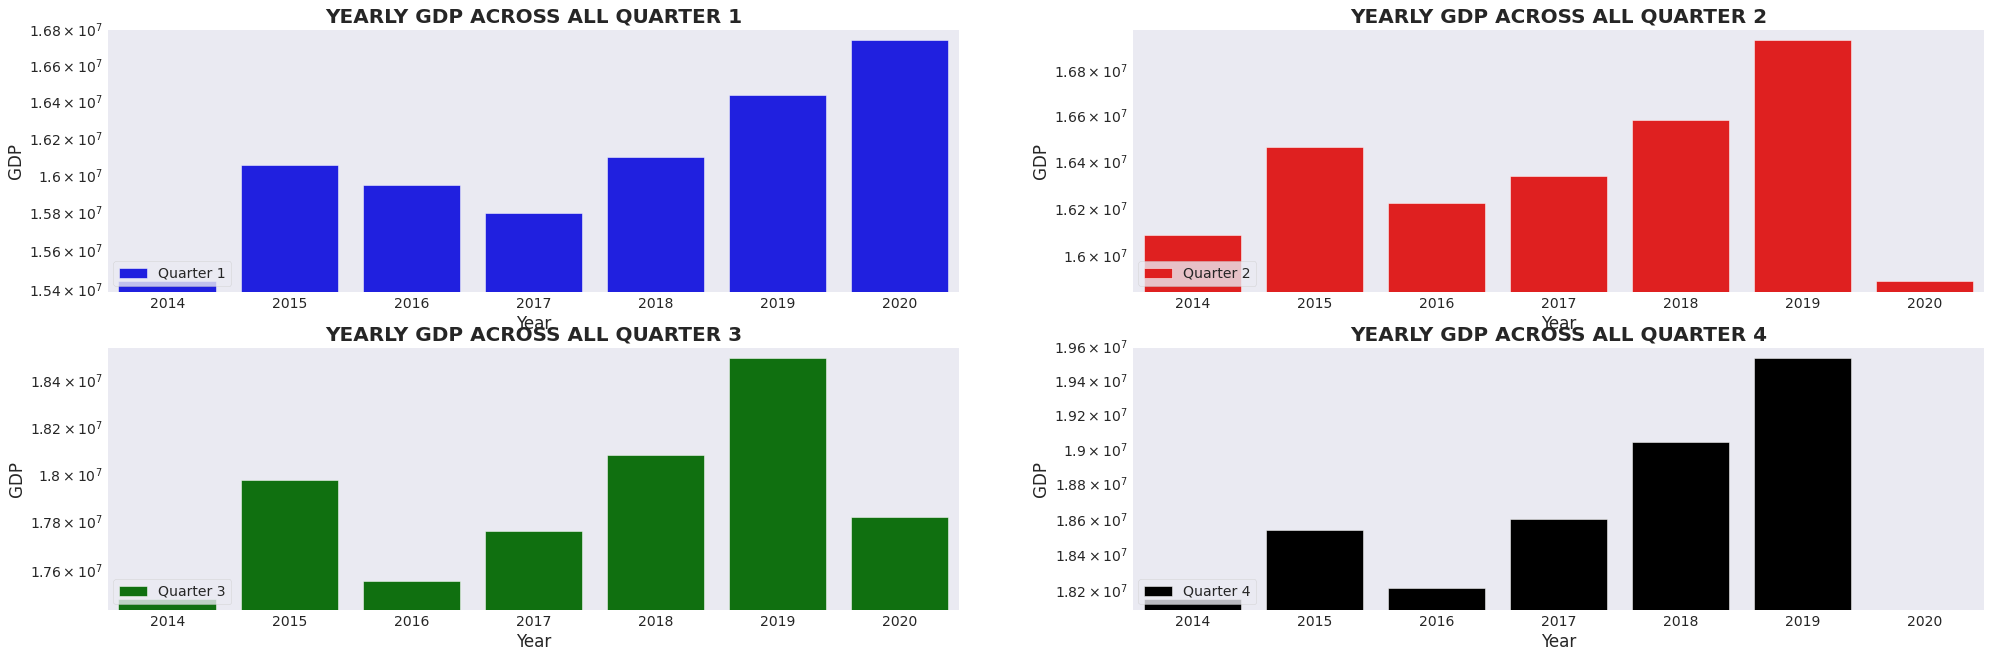

In [156]:
fig,ax=plt.subplots(figsize=(30,10))

plt.subplot(2,2,1)
sns.barplot(x='Year',y='GDP',data=qt1,color='blue',label='Quarter 1',log=True)
plt.title('YEARLY GDP ACROSS ALL QUARTER 1',fontsize=20,weight='bold')
plt.legend(loc=3)

plt.subplot(2,2,2)
sns.barplot(x='Year',y='GDP',data=qt2,color='red',label='Quarter 2',log=True)
plt.title('YEARLY GDP ACROSS ALL QUARTER 2',fontsize=20,weight='bold')
plt.legend(loc=3)

plt.subplot(2,2,3)
sns.barplot(x='Year',y='GDP',data=qt3,color='green',label='Quarter 3',log=True)
plt.title('YEARLY GDP ACROSS ALL QUARTER 3',fontsize=20,weight='bold')
plt.legend(loc=3)

plt.subplot(2,2,4)
sns.barplot(x='Year',y='GDP',data=qt4,color='black',label='Quarter 4',log=True)
plt.title('YEARLY GDP ACROSS ALL QUARTER 4',fontsize=20,weight='bold')
plt.legend(loc=3)

plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/quarter_gdp')

In [96]:
realgdp_data[realgdp_data['Year']==2020]['Q2']

6    15890000.0
Name: Q2, dtype: float64

### Covid Nigeria Data Analysis

In [97]:
covid_ng_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [98]:
covid_ng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 952.0+ bytes


In [99]:
def remove_comma(feature):
    covid_ng_data[feature]=covid_ng_data[feature].str.replace(',','').astype('int64')

In [100]:
remove_comma('No. of Cases (Lab Confirmed)')
remove_comma('No. of Cases (on admission)')
remove_comma('No. Discharged')

In [101]:
covid_ng_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [102]:
covid_ng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ KB


In [103]:
covid_ng_data.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37.000000,37.000000,37.000000,37.000000
mean,2119.837838,240.810811,1846.027027,33.000000
std,4537.417740,595.255773,4009.464785,41.797794
min,5.000000,0.000000,3.000000,2.000000
25%,381.000000,25.000000,300.000000,11.000000
50%,897.000000,57.000000,775.000000,21.000000
75%,1843.000000,183.000000,1737.000000,36.000000
max,26708.000000,2840.000000,24037.000000,236.000000


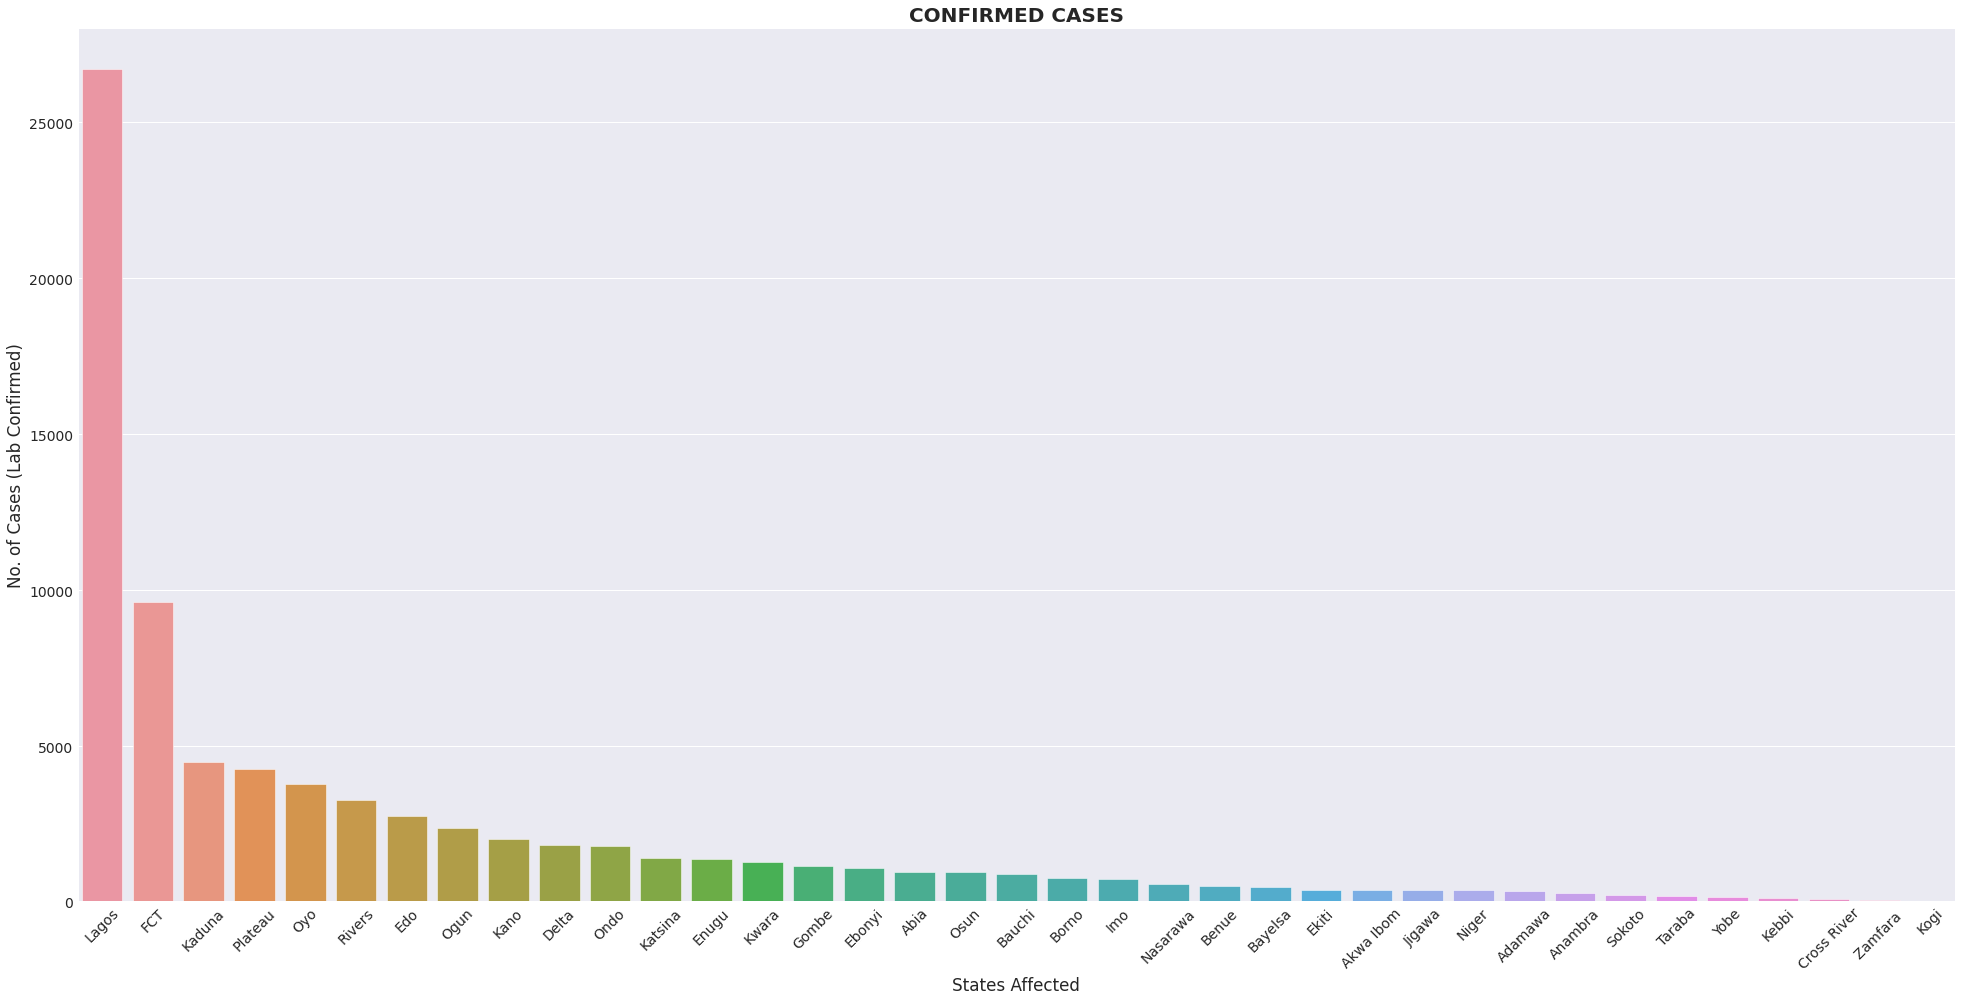

In [104]:
fig,ax=plt.subplots(figsize=(30,15))
sns.barplot(x='States Affected',y='No. of Cases (Lab Confirmed)',data=covid_ng_data)
plt.title('CONFIRMED CASES',fontsize=20,weight='bold')
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/conf_cases')

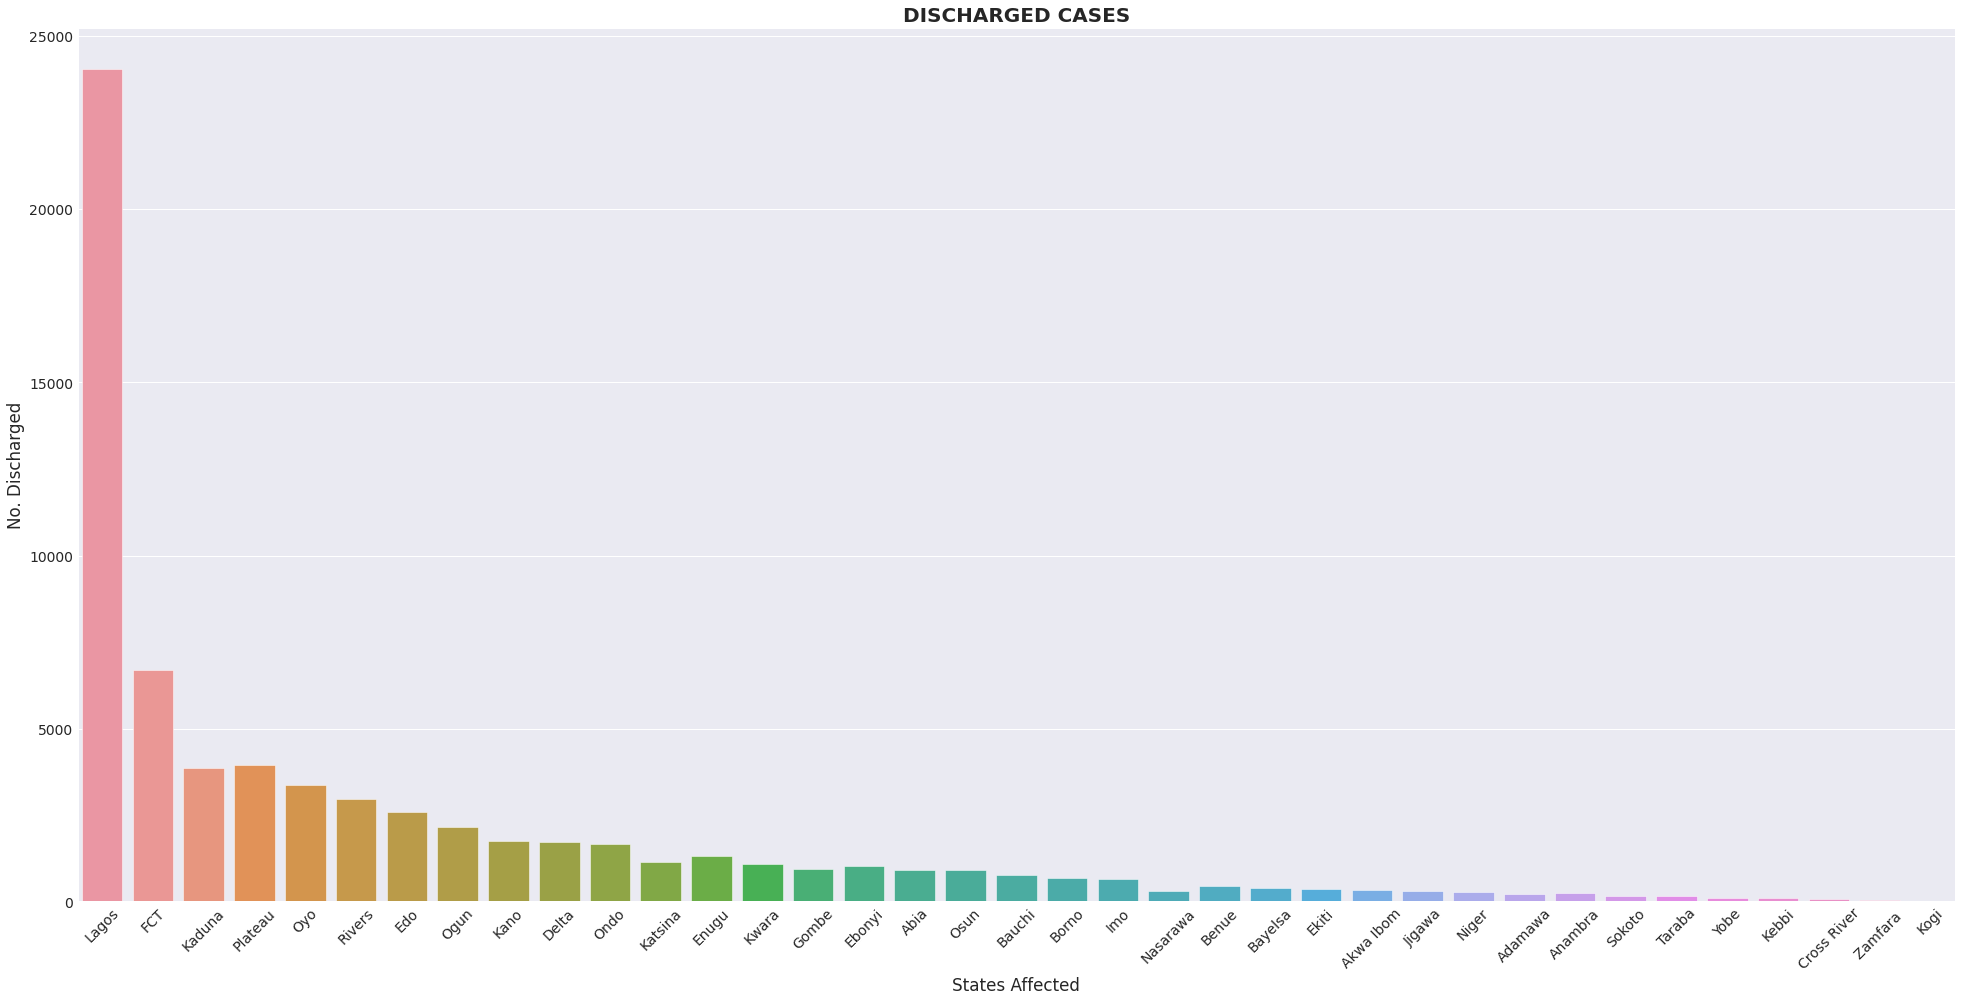

In [105]:
fig,ax=plt.subplots(figsize=(30,15))
sns.barplot(x='States Affected',y='No. Discharged',data=covid_ng_data)
plt.title('DISCHARGED CASES',fontsize=20,weight='bold')
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/disch_cases')

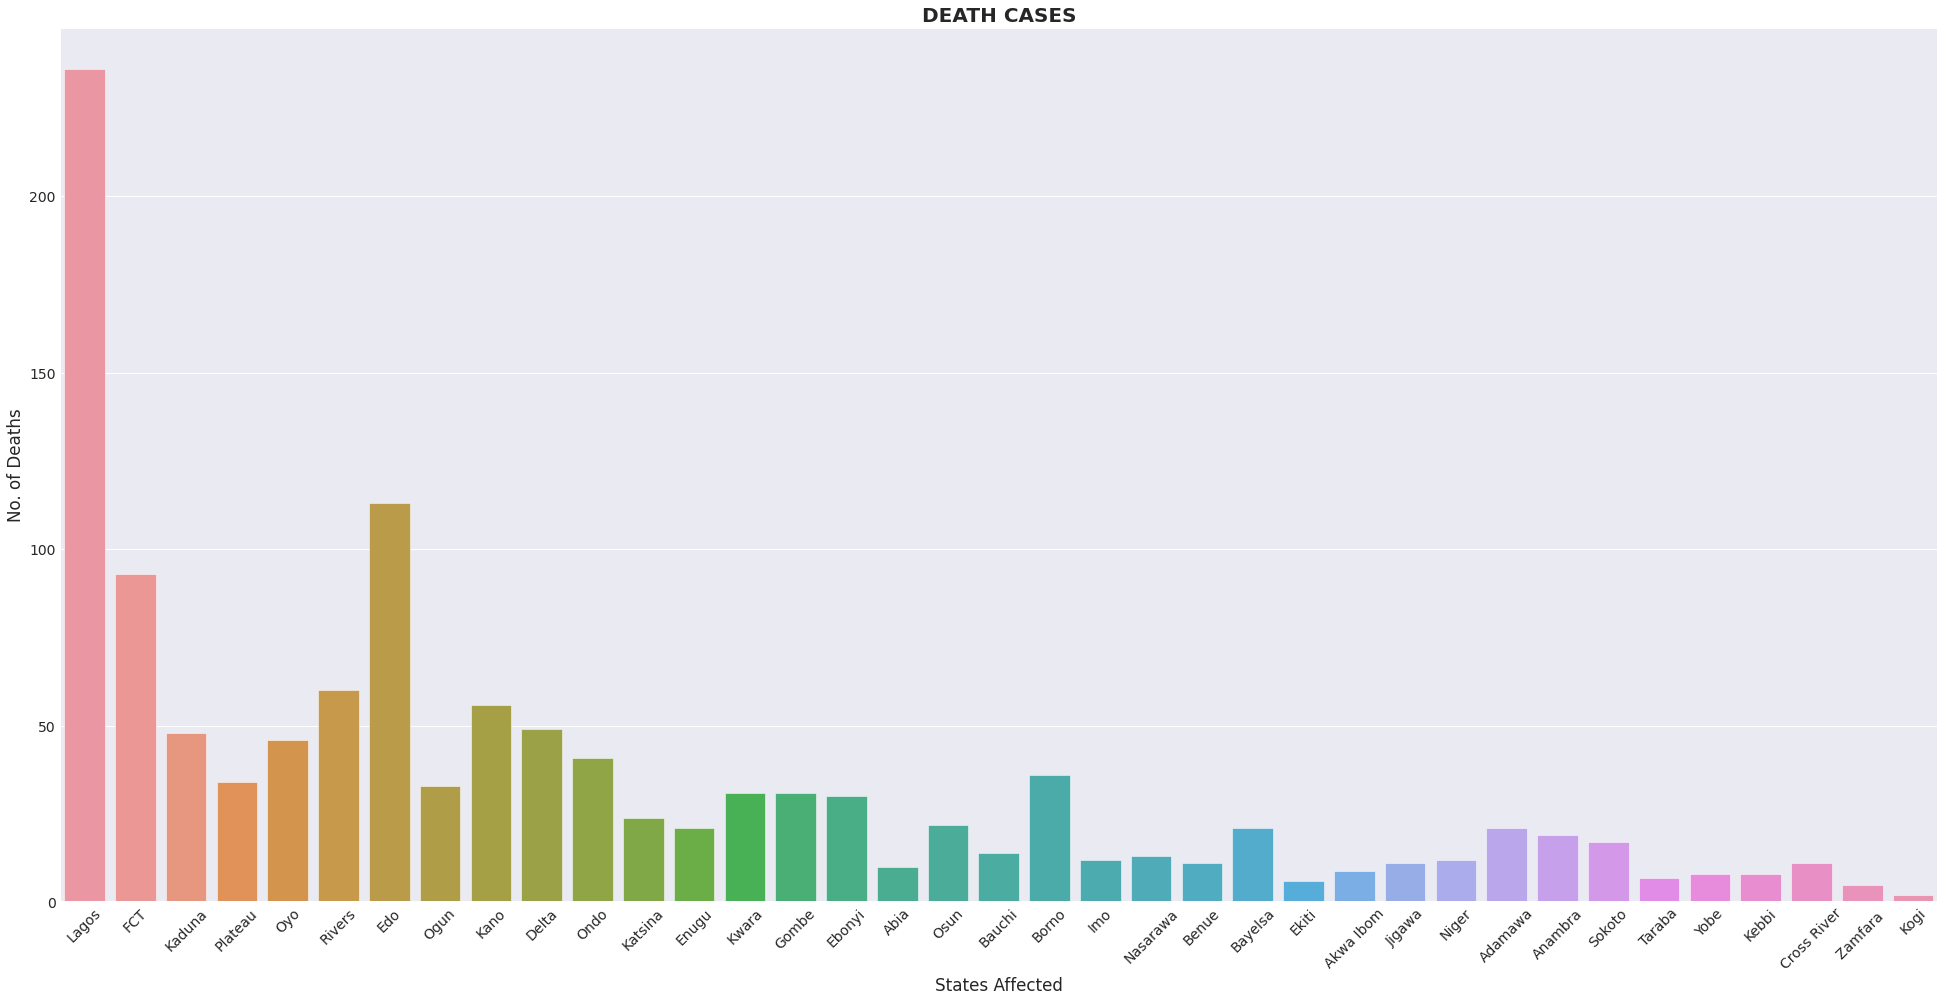

In [106]:
fig,ax=plt.subplots(figsize=(30,15))
sns.barplot(x='States Affected',y='No. of Deaths',data=covid_ng_data)
plt.title('DEATH CASES',fontsize=20,weight='bold')
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/death_cases')

### Budget Data Analysis

States across the country reduced their initial budget due to the impact of COVID-19 on the economy. 

The data is to be used to determine the impact of COVID-19 on the economy.

In [107]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [108]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 804.0+ bytes


In [109]:
budget_data.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [110]:
budget_data.isnull().sum()

states                 0
Initial_budget (Bn)    0
Revised_budget (Bn)    0
dtype: int64

In [111]:
budget_data['Percentage Change In Budget(%)']=(budget_data['Initial_budget (Bn)']-budget_data['Revised_budget (Bn)'])/(budget_data['Initial_budget (Bn)']) * 100

In [112]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,24.816984
1,Adamawa,183.30,139.31,23.998909
2,Akwa-Ibom,597.73,366.00,38.768340
3,Anambra,137.10,112.80,17.724289
4,Bauchi,167.20,128.00,23.444976
5,Bayelsa,242.18,183.15,24.374432
6,Benue,189.00,119.00,37.037037
7,Borno,146.80,108.80,25.885559
8,Cross River,1100.00,147.10,86.627273
9,Delta,395.50,282.30,28.621997


In [113]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   states                          37 non-null     object 
 1   Initial_budget (Bn)             37 non-null     float64
 2   Revised_budget (Bn)             37 non-null     float64
 3   Percentage Change In Budget(%)  37 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


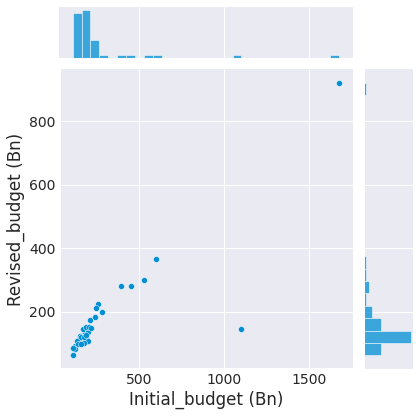

In [114]:
sns.jointplot(x='Initial_budget (Bn)',y='Revised_budget (Bn)',data=budget_data)

In [115]:
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,24.816984
1,Adamawa,183.30,139.31,23.998909
2,Akwa-Ibom,597.73,366.00,38.768340
3,Anambra,137.10,112.80,17.724289
4,Bauchi,167.20,128.00,23.444976


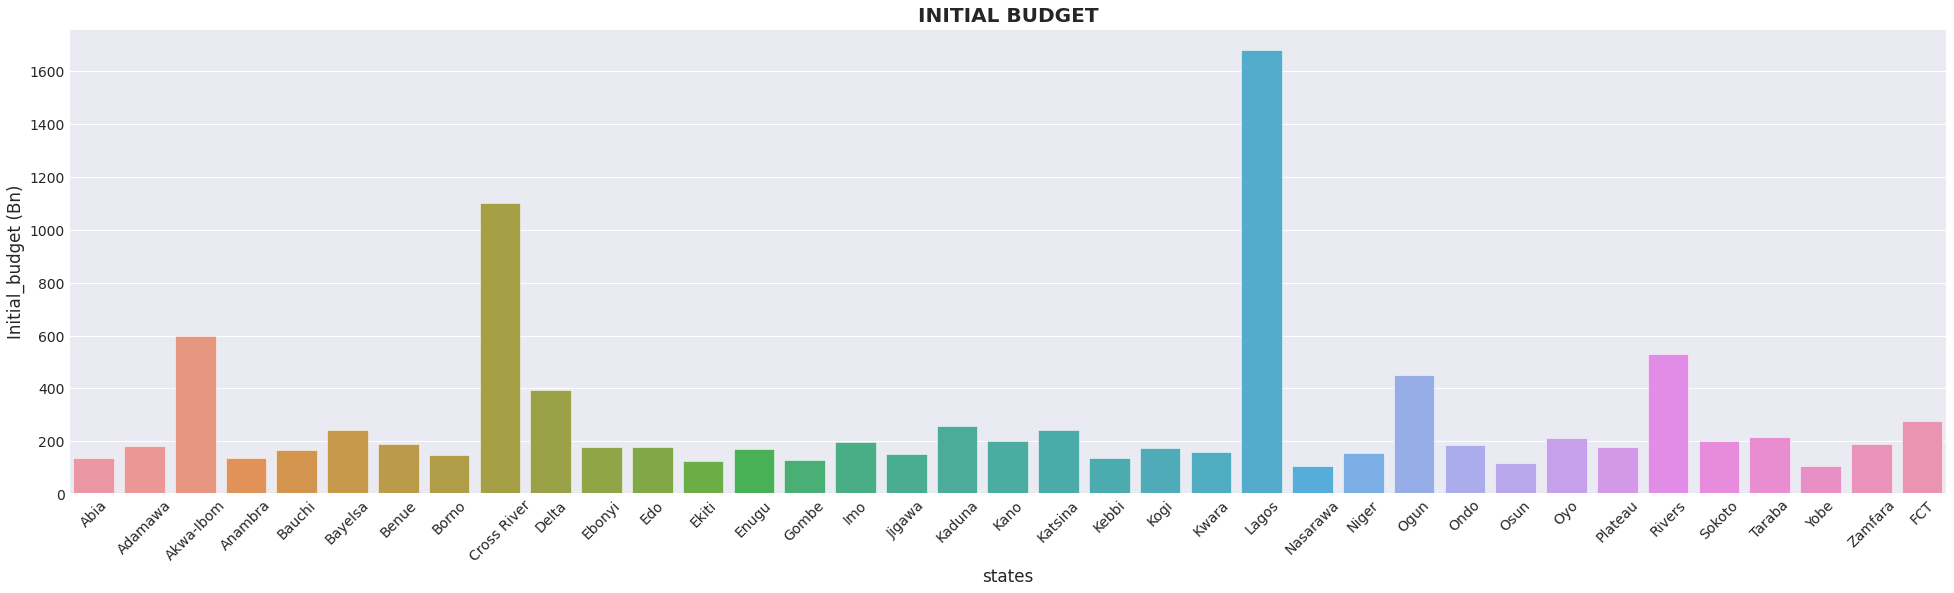

In [116]:
fig,ax=plt.subplots(figsize=(30,8))
sns.barplot(x='states',y='Initial_budget (Bn)',data=budget_data)
plt.title('INITIAL BUDGET',fontsize=20,weight='bold')
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/initial_budget')

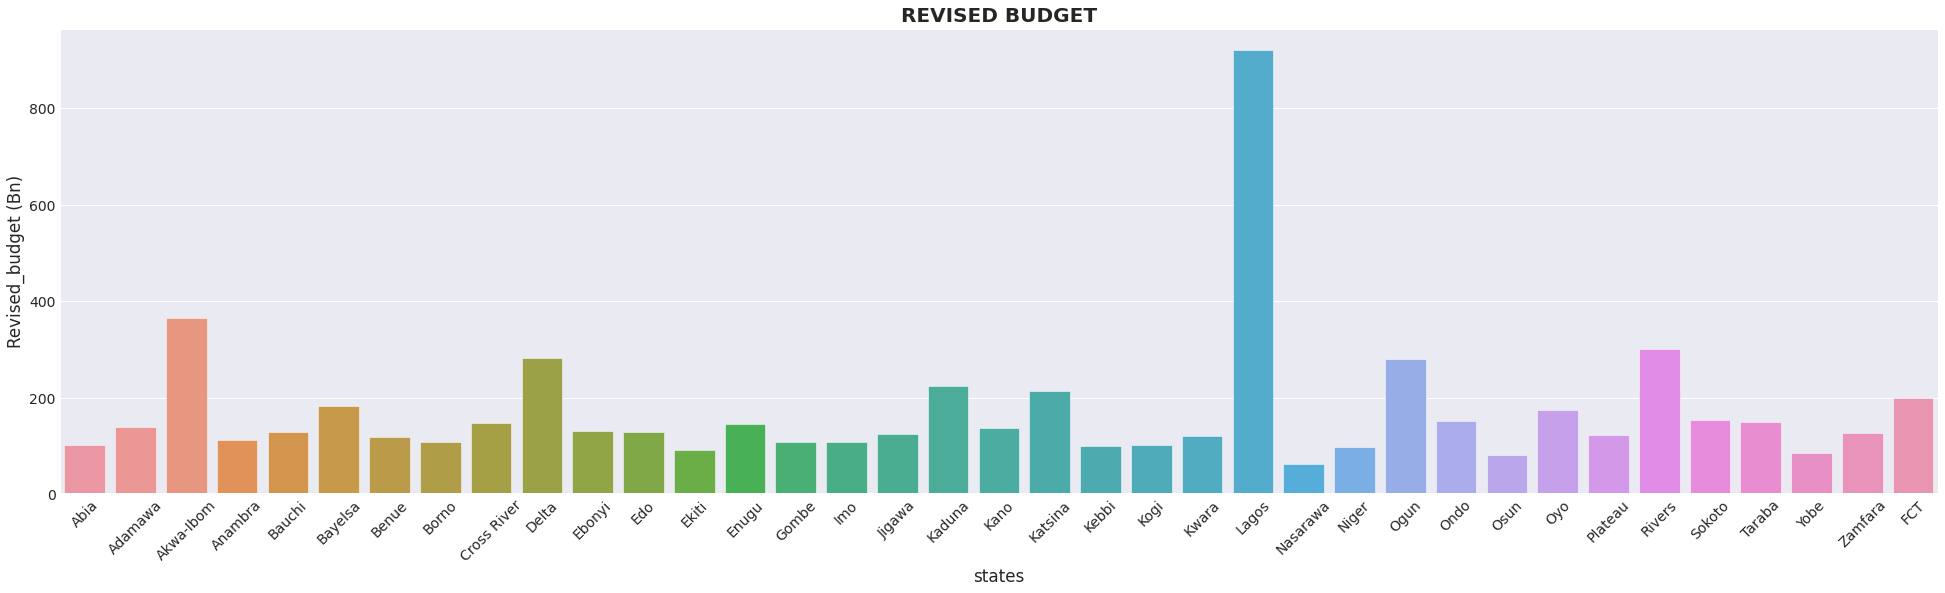

In [117]:
fig,ax=plt.subplots(figsize=(30,8))
sns.barplot(x='states',y='Revised_budget (Bn)',data=budget_data)
plt.title('REVISED BUDGET',fontsize=20,weight='bold')
plt.xticks(rotation=45)
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/revised_budget')

Lagos has the highest budget prior to the pandemic with 1.7trn and after the revised budget was released with 920bn

In [118]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,24.816984
1,Adamawa,183.30,139.31,23.998909
2,Akwa-Ibom,597.73,366.00,38.768340
3,Anambra,137.10,112.80,17.724289
4,Bauchi,167.20,128.00,23.444976
5,Bayelsa,242.18,183.15,24.374432
6,Benue,189.00,119.00,37.037037
7,Borno,146.80,108.80,25.885559
8,Cross River,1100.00,147.10,86.627273
9,Delta,395.50,282.30,28.621997


In [119]:
budget_data['Percentage Change In Budget(%)'].mean()

29.769165627276895

In [120]:
budget_data[budget_data['Percentage Change In Budget(%)']==budget_data['Percentage Change In Budget(%)'].min()]

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
19,Katsina,244.0,213.0,12.704918


In [121]:
budget_data[budget_data['Percentage Change In Budget(%)']==budget_data['Percentage Change In Budget(%)'].max()]

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
8,Cross River,1100.0,147.1,86.627273


The analysis from the initial and revised budget data shows that the average percentage budget drop in Nigeria across all states is approximately 30%

katsina had the lowest percentage change of about 13% from 344Bn to 213Bn 

Cross River had the highest percentage change of about 87% from 1.1trn to 147bn

## OIL PRICE DATA

In [122]:
missing_values=['NaN','n/a','Null']
data=pd.read_excel('/storage/emulated/0/Download/COVID_PROJECT/oil_stat.xlsx',1,na_values=missing_values)

In [123]:
data.drop([0,1],axis=0,inplace=True)

In [124]:
columns=['Date','Landed Cost Of Nigeria Crude Oil ($/bbl)']
oil_stat=pd.DataFrame(data.values,columns=columns)
oil_stat

,Date,Landed Cost Of Nigeria Crude Oil ($/bbl)
0,1973-10-15,7.46
1,1973-11-15,9.01
2,1973-12-15,10.71
3,1974-01-15,13.67
4,1974-02-15,13.96
...,...,...
556,2020-10-15,NaN
557,2020-11-15,NaN
558,2020-12-15,53.81
559,2021-01-15,NaN


In [125]:
mean=oil_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)'].mean()
oil_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)']=oil_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)'].fillna(mean)

In [126]:
oil_stat['Date']=pd.to_datetime(oil_stat['Date'])

In [127]:
oil_stat

,Date,Landed Cost Of Nigeria Crude Oil ($/bbl)
0,1973-10-15,7.460000
1,1973-11-15,9.010000
2,1973-12-15,10.710000
3,1974-01-15,13.670000
4,1974-02-15,13.960000
...,...,...
556,2020-10-15,38.692734
557,2020-11-15,38.692734
558,2020-12-15,53.810000
559,2021-01-15,38.692734


In [128]:
recent_stat=oil_stat[547:]

In [129]:
recent_stat

,Date,Landed Cost Of Nigeria Crude Oil ($/bbl)
547,2020-01-15,38.692734
548,2020-02-15,62.070000
549,2020-03-15,38.692734
550,2020-04-15,38.692734
551,2020-05-15,38.692734
552,2020-06-15,38.692734
553,2020-07-15,38.692734
554,2020-08-15,38.692734
555,2020-09-15,38.692734
556,2020-10-15,38.692734


In [130]:
recent_stat[recent_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)']==recent_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)'].max()]['Date']

548   2020-02-15
Name: Date, dtype: datetime64[ns]

In recent data that is from 2020-date the date with the highest US landed cost of Nigeria crude oil was found to be on 15th Of February 2020

In [131]:
recent_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)'].min()

38.69273437499998

In [132]:
recent_stat[recent_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)']==recent_stat['Landed Cost Of Nigeria Crude Oil ($/bbl)'].min()]['Date']

547   2020-01-15
549   2020-03-15
550   2020-04-15
551   2020-05-15
552   2020-06-15
553   2020-07-15
554   2020-08-15
555   2020-09-15
556   2020-10-15
557   2020-11-15
559   2021-01-15
560   2021-02-15
Name: Date, dtype: datetime64[ns]

All the months from January 2020 to February 2021 excluding February 2020 and December 2020 have their values at the minimum for the range of 2020 to 2021 with 38.7$/bbl

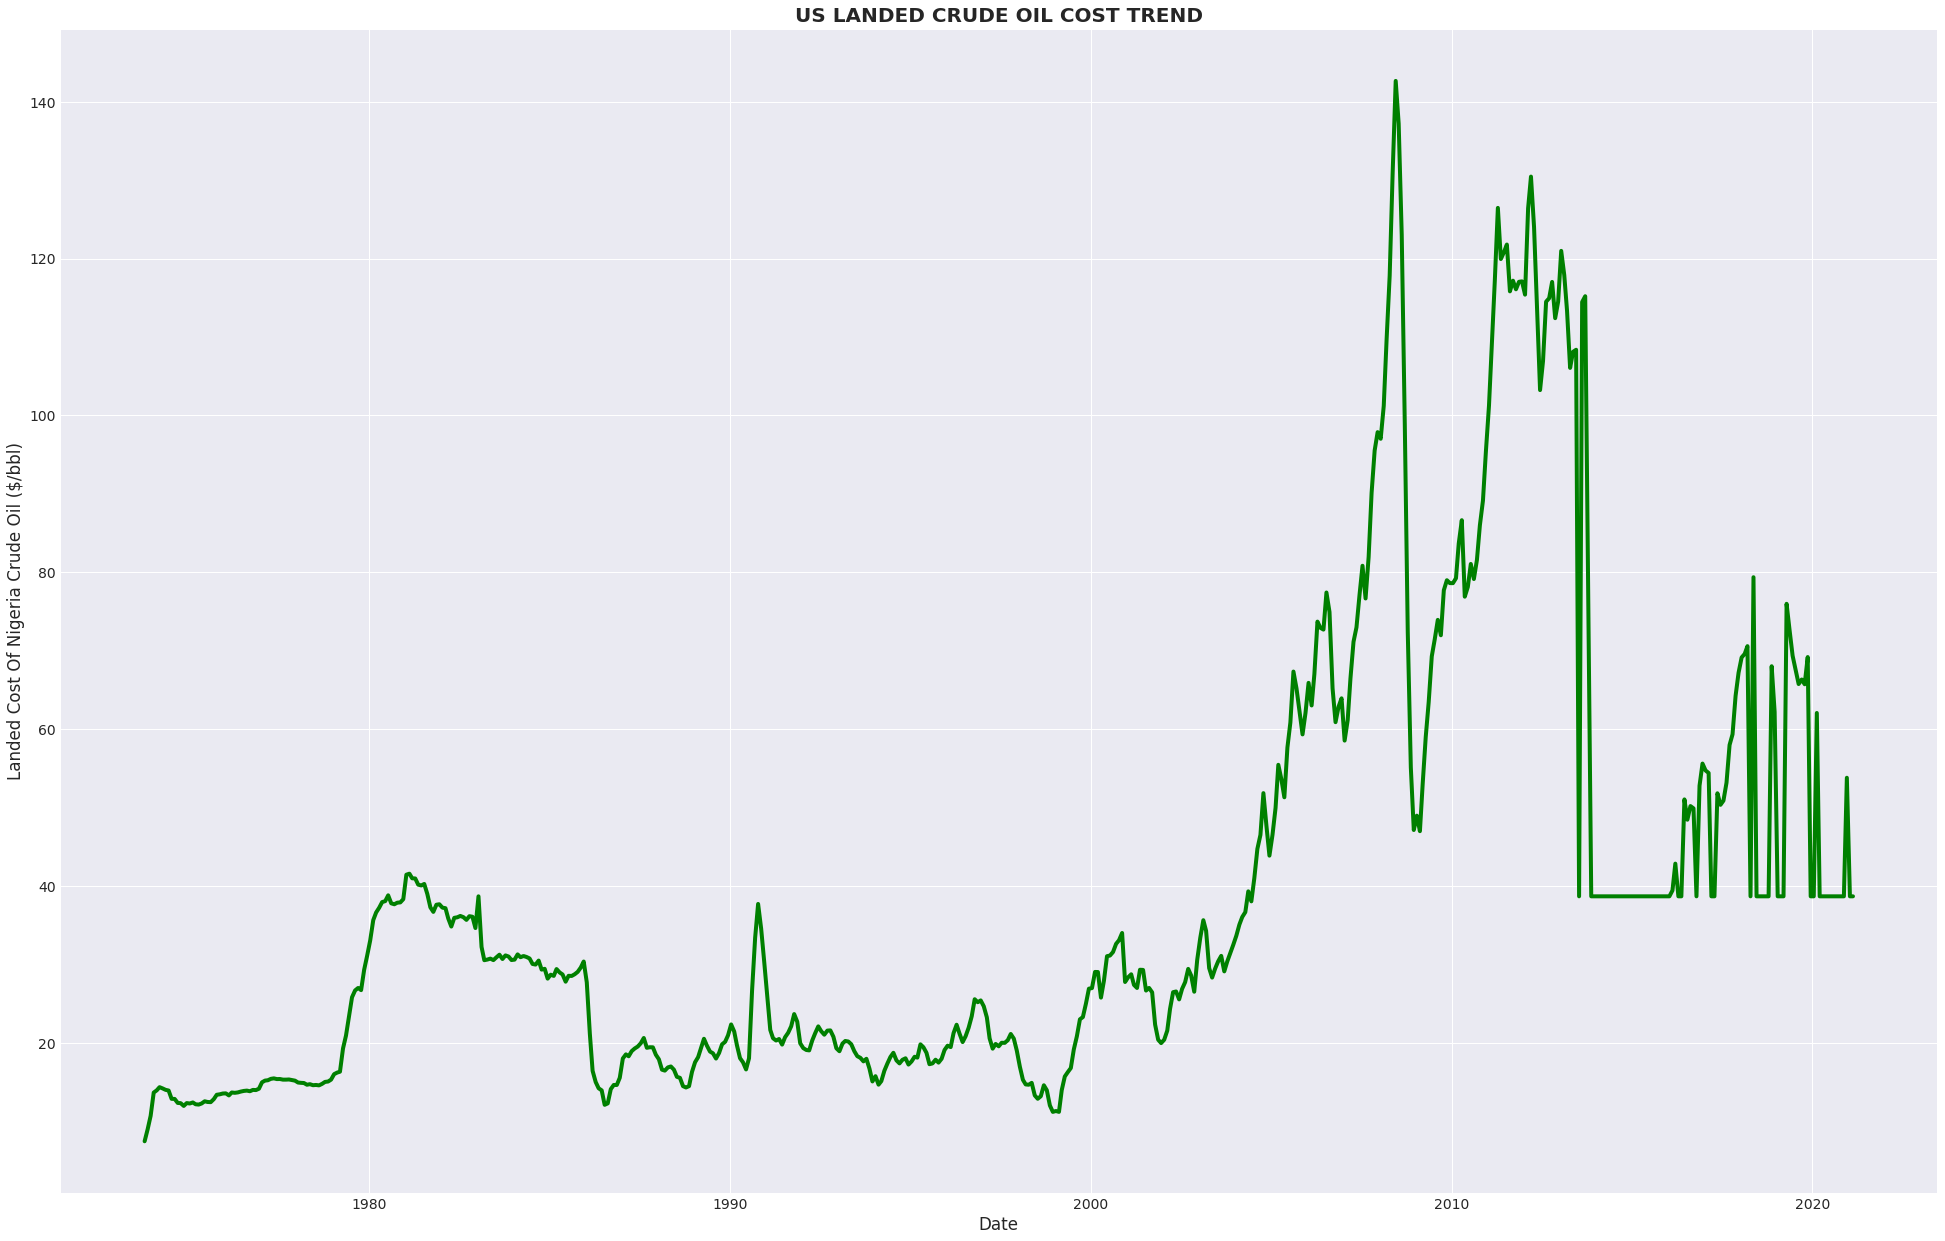

In [155]:
fig,ax=plt.subplots(figsize=(30,20))
sns.lineplot(x='Date',y='Landed Cost Of Nigeria Crude Oil ($/bbl)',data=oil_stat,color='green')
plt.title('US LANDED CRUDE OIL COST TREND',fontsize=20,weight='bold')
plt.savefig('/storage/emulated/0/Download/COVID_PROJECT/Images/oil_stat')

This trend plot shows that the US landel cost of Nigeria crude oil has been in a downtrend from the first quarter of 2020 and is still yet to break the downtrend structure